<a href="https://colab.research.google.com/github/19150806/KVTT0/blob/Code/Copy_of_COMP0091_KVTT0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')
%matplotlib inline
from IPython.display import clear_output
sns.set(font_scale=1)
sns.set_style('darkgrid')
from sklearn.impute import KNNImputer
import collections
from matplotlib.colors import ListedColormap

### Set-up


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [ ]:
df_behaviours = pd.read_csv('/content/drive/MyDrive/thesis/Behaviours_UCL.csv')
df_core = pd.read_csv('/content/drive/MyDrive/thesis/CORE_UCL.csv')
df_employees = pd.read_csv('/content/drive/MyDrive/thesis/Employees_UCL.csv')
df_itemlevel = pd.read_csv('/content/drive/MyDrive/thesis/Itemlevel_UCL.csv')
df_wbw = pd.read_csv('/content/drive/MyDrive/thesis/WBW_UCL.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_wbw_2 = pd.read_csv('/content/drive/MyDrive/thesis/WBW_UCL_2.csv')

In [ ]:
df_wbw['ALF'].nunique()

13352

In [ ]:
df_behaviours['ALF'].nunique()

24915

In [ ]:
df_employees['ALF'].nunique()

55297

In [ ]:
df_core['ALF'].nunique()

2788

In [ ]:
df_itemlevel['ALF'].nunique()

13205

In [ ]:
df_wbw['start_time'] = pd.to_datetime(df_wbw['start_time'])
df_wbw['end_time'] = pd.to_datetime(df_wbw['end_time'])

In [ ]:
df_wbw_2['start_time'] = pd.to_datetime(df_wbw_2['start_time'])
df_wbw_2['end_time'] = pd.to_datetime(df_wbw_2['end_time'])

In [ ]:
df_itemlevel['response_created_at'] = pd.to_datetime(df_itemlevel['response_created_at'])

In [ ]:
df_core['start_time'] = pd.to_datetime(df_core['start_time'])
df_core['CORE_date'] = pd.to_datetime(df_core['CORE_date'])

In [ ]:
df_behaviours['date_of_behaviour'] = pd.to_datetime(df_behaviours['date_of_behaviour'])

###Heads

In [ ]:
df_behaviours.loc[df_behaviours['ALF'] ==2996]

,behaviour,issue_number,life_event_name,content_id,external_service,support,tip_exercise,content_name,content_source,content_media_type,date_of_behaviour,topic_name,topic_custom_name,external_service_link,ALF
97994,open_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-27 10:13:29,NaN,NaN,NaN,2996
97995,open_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-09 18:01:22,NaN,NaN,NaN,2996
97996,open_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-15 14:59:56,NaN,NaN,NaN,2996
97997,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-03 17:18:48,NaN,NaN,NaN,2996
97998,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-04 14:47:50,NaN,NaN,NaN,2996
97999,open_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-28 08:42:01,NaN,NaN,NaN,2996
98000,open_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-22 08:11:57,NaN,NaN,NaN,2996
98001,open_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-19 18:01:12,NaN,NaN,NaN,2996
98002,read_content,NaN,NaN,5be2e95387cfb30da8221905,NaN,NaN,NaN,No more counting sheep: Proven behaviors to he...,ideasHub,article,2020-03-28 08:42:24,NaN,NaN,NaN,2996
98003,open_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 08:02:36,NaN,NaN,NaN,2996


In [ ]:
df_core.head()

,start_time,occasion,CORE_score,CORE_date,risk_band,ALF
0,2020-12-09 13:21:04,0,33,2020-12-09,high risk,49295
1,2021-04-08 13:24:37,1,8,2021-04-08,low risk,49295
2,2020-11-20 10:24:17,0,11,2020-11-20,medium risk,50218
3,2021-02-05 10:46:50,1,12,2021-02-05,medium risk,50218
4,2020-11-16 20:59:23,0,22,2020-11-16,high risk,50673


In [ ]:
df_employees.loc[df_employees['ALF'] ==1658]

,company_id,ALF,employee_is_manager,appuser,age,gender,manager
2,Consumer Services 1,1658.0,0.0,1,NaN,NaN,0.0


In [ ]:
df_itemlevel.loc[df_itemlevel['ALF'] ==2996].sort_values('response_created_at') #2996, 1658

,response_created_at,score_update_type,question,answer,set_name,answer_score,ALF
140906,2020-03-24 07:43:43,baseline,It's difficult for me to arrange my life in a ...,Disagree,Mastery: Set A,5,2996
140932,2020-03-24 07:43:43,baseline,I am pretty good at figuring out what really m...,Completely true,Happiness: Set A,6,2996
140931,2020-03-24 07:43:43,baseline,"When I think about it, my life could be a lot ...",Somewhat untrue,Life satisfaction: Set A,4,2996
140930,2020-03-24 07:43:43,baseline,I feel very positive about myself.,Mostly true,Life satisfaction: Set A,5,2996
140929,2020-03-24 07:43:43,baseline,I am quite good at managing complex problems.,Agree,Mastery: Set A,5,2996
140928,2020-03-24 07:43:43,baseline,A lot of the time I'm unsure about what really...,Mostly untrue,Purpose in Life: Set A,5,2996
140927,2020-03-24 07:43:43,baseline,I am quite good at managing a lot of information.,Agree,Mastery: Set A,5,2996
140926,2020-03-24 07:43:43,baseline,I consider myself to be a cheerful person.,Somewhat true,Happiness: Set A,4,2996
140925,2020-03-24 07:43:43,baseline,I believe that everyday challenges have a posi...,Slightly agree,Optimism: Set A,4,2996
140924,2020-03-24 07:43:43,baseline,"I am usually in a good mood, even without a sp...",Somewhat true,Happiness: Set A,4,2996


In [ ]:
df_wbw.loc[df_wbw['ALF'] == 52284][df_wbw['score_update_type']=='activity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,start_time,end_time,score_update_type,dimension_name,sub_dimension_name,occasion,userscore,set_name,time,septile,ALF
473129,2021-04-04 11:01:55,2021-04-04 11:01:55,activity,physical,physical_stress,0,NaN,NaN,NaN,NaN,52284
473160,2021-03-22 10:03:12,2021-03-22 10:03:12,activity,learning_development,creativity_and_flexibility,0,NaN,NaN,NaN,NaN,52284
473168,2021-03-28 11:03:47,2021-03-28 11:03:47,activity,physical,sleep_and_rest,0,NaN,NaN,NaN,NaN,52284
473177,2021-03-07 12:05:18,2021-03-07 12:05:18,activity,psychological,accepting_yourself,0,NaN,NaN,NaN,NaN,52284


###Wellbeing wheel Data Set

In [ ]:
df_wbw['score_update_type'].unique()

array(['activity', 'remeasure', 'Daily_workout', 'keepTrack', 'digDeeper',
       'baseline'], dtype=object)

In [ ]:
df_wbw_2['dimension_name'].unique()

array(['social', 'emotional', 'physical', 'global',
       'learning_development', 'psychological', 'work_related', nan],
      dtype=object)

In [ ]:
scoop =np.array(df_wbw_2.loc[df_wbw_2['score_update_type'] == 'remeasure'][df_wbw_2['ALF']==49295][df_wbw_2['dimension_name']==dimension_names[6]][df_wbw_2['occasion']==1]['septile_dim']) #[df_wbw_2['ALF']==50212]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
scoop[0]

1.0

In [ ]:
(df_wbw_2.loc[df_wbw_2['score_update_type'] == 'baseline'][df_wbw_2['ALF']==50212]).groupby('dimension_name')['septile_dim'].mean() #49295 [df_wbw_2['dimension_name']=='learning_development']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


dimension_name
emotional               4.0
global                  4.0
learning_development    0.0
physical                0.0
psychological           5.0
social                  3.0
work_related            NaN
Name: septile_dim, dtype: float64

In [ ]:
  boop = np.array((df_wbw_2.loc[df_wbw_2['ALF'] == 49295][df_wbw_2['score_update_type'] == 'remeasure']).groupby('dimension_name')['septile_dim'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
boop #50212

array([ 1.,  0.,  0.,  1.,  2.,  0., nan])

In [ ]:
df_wbw['ALF'].unique()[0:10]

array([49295, 50218,   460,   324,   442,   368, 49851,   404,   491,
       50673])

In [ ]:
dimension_names = ['social', 'emotional', 'physical', 'global', 'learning_development', 'psychological', 'work_related']
dimension_names[0]

'social'

In [ ]:
beep = (np.array(df_wbw_2.loc[df_wbw_2['ALF'] == 50212][df_wbw_2['score_update_type'] == 'baseline'][df_wbw_2['dimension_name']==dimension_names[6]]['septile_dim']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
def BaselineRemeasureSeptiles(df, ALF_col):

  ''' This function finds the septile of each user for each of the 7 dimensions
  of the wellbeing wheel. 
  In the case that a user does not have a baseline, the first occasion of 
  remeasure is taken to be the baseline septiles. 
  
  Inputs
  df : dataframe you are working with. eg df_wbw_2
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_wbw_2['ALF']

  Outputs
  septiles : an array of length of ALF_col.unique(), with each row containing 
  septile of each of the 7 dimensions of the wellbeing wheel.
  '''

  septiles = np.empty([len(ALF_col.unique()), 7])
  dimension_names = ['social', 'emotional', 'physical', 'global', 'learning_development', 'psychological', 'work_related']

  for i in range(len(ALF_col.unique())):
    for j in range(len(dimension_names)):

      clear_output(wait = True)

      holder = np.array(df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'baseline'][df['dimension_name']==dimension_names[j]]['septile_dim'])
      if len(holder) > 0:
        septiles[i,j] = holder[0]
      else:
        holder = np.array(df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'remeasure'][df['dimension_name']==dimension_names[j]][df['occasion']==1]['septile_dim'])
        if len(holder) > 0:
          septiles[i,j] = holder[0]
        else:
          septiles[i,j] = np.NaN
  
    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")
  
  return septiles


In [ ]:
septiles = BaselineRemeasureSeptiles(df_wbw_2, df_wbw_2['ALF'])

Complete


In [ ]:
# so what we need to do is calculate the average userscore for each user in each septile, and then from there place it in a septile 
# according to the thing jazz sent me
septiles[0:10]

array([[nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan,  5.,  5., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan,  2., nan, nan, nan, nan, nan],
       [ 6.,  5.,  4.,  5., nan,  6.,  6.],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan,  5.,  6.,  6., nan,  6.,  6.],
       [nan, nan, nan, nan, nan, nan, nan]])

In [ ]:
np.count_nonzero(~np.isnan(septiles))

68718

In [ ]:
#df_wbw.loc[df_wbw['ALF'] == 49295][df_wbw['score_update_type'] == 'remeasure'][df_wbw['occasion'] == 1].sort_values('start_time')
#np.array((df_wbw.loc[df_wbw['ALF'] == 442][df_wbw['score_update_type'] == 'baseline']).groupby('occasion')['userscore'].mean())
#boop = np.array((df_wbw.loc[df_wbw['ALF'] == 50218][df_wbw['score_update_type'] == 'baseline']).groupby('occasion')['userscore'].mean())

#df_wbw.loc[df_wbw['ALF'] == 49295].groupby('score_update_type')['userscore'].mean()

In [ ]:
def BaselineRemeasureScores(df, ALF_col):

  ''' This function finds the average baseline and remeasure scores of each user. 
  In the case that a user does not have a baseline score, the first occasion of 
  remeasure is taken to be baseline score. 
  
  Inputs
  df : dataframe you are working with. eg df_wbw
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_wbw['ALF']

  Outputs
  scores : an array of length of ALF_col.unique(), with each row containing mean
  scores of baseline/remeasure scores. list of different lengths for each user.
  '''

  scores = np.empty([len(ALF_col.unique()), 1])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    holder = np.array((df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'baseline']).groupby('occasion')['userscore'].mean())
    if len(holder) == 0:
      holder = np.array((df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'remeasure']).groupby('occasion')['userscore'].mean())
      if len(holder) == 0:
        holder = np.NaN
      elif len(holder) != 0:
        holder = np.array((df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'remeasure']).groupby('occasion')['userscore'].mean())[0]

    scores[i] = holder
  
    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")
  
  return scores


In [ ]:
scores = BaselineRemeasureScores(df_wbw, df_wbw['ALF'])

In [ ]:
np.nanmean(scores), np.nanstd(scores)

In [ ]:
fig11 = sns.displot(data = ((np.sort(scores.round(decimals = 2).T)).T), bins = 80, kde = False, palette = 'viridis')
fig11.set_axis_labels('Mean baseline score', 'Number of users')

In [ ]:
def BaselineRemeasureSeptiles(df, ALF_col, septile_col):

  ''' This function finds the septile of each user for each of the 7 dimensions
  of the wellbeing wheel. 
  In the case that a user does not have a baseline, the first occasion of 
  remeasure is taken to be the baseline septiles. 
  
  Inputs
  df : dataframe you are working with. eg df_wbw_2
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_wbw_2['ALF']
  septile_col: column within the dataframe that contains the septile for each
  dimension of questions. eg df_wbw_2['septile_dim']

  Outputs
  septiles : an array of length of ALF_col.unique(), with each row containing 
  septile of each of the 7 dimensions of the wellbeing wheel.
  '''

  septiles = np.empty([len(ALF_col.unique()), 7])

  for i in range(len(ALF_col.unique())):

    clear_output(wait = True)
  
    #first try get it from baseline but needs to be 7 long
    holder = np.array((df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'baseline']).groupby('dimension_name')['septile_dim'].mean())
    #if theres 7 values in holder than all good
    if len(holder) == 7:
      holder = holder
    # if theres no baseline, get it from remeasure, but then will need to check if thats 7 long
    elif len(holder) == 0:
      holder = np.array((df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'remeasure'][df['occasion']==1]).groupby('dimension_name')['septile_dim'].mean())
      if len(holder) == 7:
        holder = holder
    # otherwise, if its more than 0 but less than 7, need to fill, best with remeasure scores, otherwise NaNs
    # will have to go through each dimension to see where it is    
    elif len(holder) > 0:
      holder[0] = np.array((df.loc[ALF_col == ALF_col.unique()[i]][df['score_update_type'] == 'remeasure'][df['occasion']==1]).groupby('dimension_name')['septile_dim'].mean())
      holder = df.loc[df['score_update_type'] == 'remeasure'][ALF_col == ALF_col.unique()[i]][df['dimension_name']=='global'][df['occasion']==1]

    septiles[i] = holder
  
    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")
  
  return septiles


In [ ]:
def TotalTimePerPerson(df, ALF_col, EndTime_name, StartTime_name):

  ''' This function finds the total time spent by each individual by summing the 
  intervals of each interaction on the platform and converting to seconds. 

  Inputs
  - df : dataframe you are working with. eg df_wbw 
  - ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_wbw['ALF']
  - EndTime_name : column name within the dataframe with the end_time timestamp of 
  each interaction on the platform. eg df_wbw.loc[df_wbw['ALF'] == #no]['end_time']
  - StartTime_name: similar to EndTime_name. eg df_wbw.loc[df_wbw['ALF'] == #no]['start_time']

  Outputs
  - elapsed_time : array containing total elapsed time for each individual, 
  where their index pertains to the index of ALF_col.unique()

  Also prints the % progress through so you can get a sense of how long it will take
  '''

  elapsed_time = np.empty([len(ALF_col.unique()), 1])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    elapsed_time[i] = ((df.loc[ALF_col == ALF_col.unique()[i]][EndTime_name] - df.loc[ALF_col == ALF_col.unique()[i]][StartTime_name]).sum()).total_seconds()
  
    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")
  
  return elapsed_time

In [ ]:
tottime_wbw = TotalTimePerPerson(df_wbw, df_wbw['ALF'], 'end_time', 'start_time')

In [ ]:
#6401 users with 0 total time 
df_wbw.loc[df_wbw['ALF'] == df_wbw['ALF'].unique()[np.where(tottime_wbw == 0)[0][3001]]].sort_values('start_time').head()

In [ ]:
#this is the 4th alf in the dataset, and it has a total elapsed time of 0 seconds
df_wbw.loc[df_wbw['ALF'] == 324].sort_values('start_time').head()

,start_time,end_time,score_update_type,dimension_name,sub_dimension_name,occasion,userscore,set_name,time,septile,ALF
446,2018-09-12 08:39:54,2018-09-12 08:39:54,activity,global,happiness,0,NaN,NaN,NaN,NaN,324
441,2018-09-28 19:06:24,2018-09-28 19:06:24,activity,emotional,depression,0,NaN,NaN,NaN,NaN,324
444,2018-09-28 19:06:51,2018-09-28 19:06:51,activity,global,mastery,0,NaN,NaN,NaN,NaN,324
447,2018-10-10 12:46:55,2018-10-10 12:46:55,activity,psychological,adaptability,0,NaN,NaN,NaN,NaN,324
443,2018-10-10 12:47:48,2018-10-10 12:47:48,activity,learning_development,creativity_and_flexibility,0,NaN,NaN,NaN,NaN,324


In [ ]:
#this is the 3rd alf in the data set, with a total elapsed time of 1639083 s = 18.97 days....
#all of that time is due to the 393rd row (2nd in the set below) -- all the rest have a total of 0 seconds
df_wbw.loc[df_wbw['ALF'] == 460].sort_values('start_time').head()

,start_time,end_time,score_update_type,dimension_name,sub_dimension_name,occasion,userscore,set_name,time,septile,ALF
397,2018-11-02 10:03:35,2018-11-02 10:03:35,activity,emotional,depression,0,NaN,NaN,NaN,NaN,460
419,2019-01-15 07:16:17,2019-01-15 07:16:17,activity,emotional,emotional_awareness,0,NaN,NaN,NaN,NaN,460
406,2019-01-16 09:00:42,2019-01-16 09:00:42,activity,emotional,anxiety,0,NaN,NaN,NaN,NaN,460
424,2019-03-07 13:35:09,2019-03-07 13:35:09,activity,social,understanding_others,0,NaN,NaN,NaN,NaN,460
429,2019-03-26 13:12:04,2019-03-26 13:12:04,activity,social,emotional_support,0,NaN,NaN,NaN,NaN,460


In [ ]:
print("Median: ", np.median(tottime_wbw))
print("Mean: ", np.mean(tottime_wbw))
print("Mode: ", stats.mode(tottime_wbw))

#this shows over half of the entries have a total of 0 seconds? 6401, compared to 13352 total.... 
#maybe i need to change the way im thinking about this
#just focus on visits and not the time???

In [ ]:
print("Number of users with total 0secs: ", np.count_nonzero(tottime_wbw==0))
print("Number of users with fewer than 1 hour usage (but more than 0s): " ,np.count_nonzero((0 < tottime_wbw) & (tottime_wbw < 3600)))
print("Number of users with more than 1 hour, fewer than 1 day usage: " ,np.count_nonzero((3600 <= tottime_wbw) & (tottime_wbw < 86400)))
print("Number of users with more than 1 day, fewer than 2 days usage: " ,np.count_nonzero((86400 <= tottime_wbw) & (tottime_wbw < 2 * 86400)))
print("Number of users with more than 2 days usage: " ,np.count_nonzero((2 * 86400 <= tottime_wbw)))

#could put this into a table or something to give an overview on the usage? but first need to address the big outliers

In [ ]:
fig12 = sns.displot(data = ((np.sort(tottime_wbw.T)).T), bins = 100, kde = False, palette = 'viridis')
fig12.set(yscale = 'log')
fig12.set_axis_labels('Total Time spent in seconds', 'Number of users')

In [ ]:
def NumberOfInteractionsPerPerson(df, ALF_col):

  ''' This functions find the total number of interactions on the platform by 
  an individual. By combining the results from this function and TotalTimePerPerson,
  an average time per visit can be calculated. 
  
  Inputs
  df : dataframe you are working with. eg df_wbw
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_wbw['ALF']

  Outputs
  visits : an array of length of ALF_col.unique(), containing the number of visits
  to the platform each individual has made
  '''

  visits = np.empty([len(ALF_col.unique()), 1])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    visits[i] = df.loc[ALF_col == ALF_col.unique()[i]].shape[0]
  
    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")
  
  return visits


In [ ]:
visits = NumberOfInteractionsPerPerson(df_wbw, df_wbw['ALF'])

In [ ]:
fig = sns.displot(data = ((np.sort(visits.T)).T), bins = 100, kde = False, palette = 'viridis')
fig.set_axis_labels('Visits', 'Count')
fig.set(yscale = 'log')

In [ ]:
def TypeOfInteractionPerPerson(df, ALF_col, update_type):

  ''' This function finds the total number and type of interactions on the platform by 
  an individual. Here, you can see the breakdown of how each user is using the app,
  whether more to access resources, or to measure their wellbeing. 
  
  Inputs
  df : dataframe you are working with. eg df_wbw
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_wbw['ALF']
  update_type: column within the dataframe that contains the type of score update
  of that interaction. one of 4: baseline, Daily_workout, activity, remeasure. 
  eg df_wbw['score_update_type']

  Outputs
  visit_type : an array of length of ALF_col.unique(), and 5 columns, containing:
  1. the number of visits to the platform each individual has made
  2. the number of baseline interactions each individual has made
  3. the number of daily workout visits each individual has made
  4. the number of activities each user has accessed
  5. the number of remeasures each individual has done

  Also outputs each column seperately to more easily inspect them one by one.
  '''

  visit_type = np.empty([len(ALF_col.unique()), 5])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    visit_type[i][0] = df.loc[ALF_col == ALF_col.unique()[i]].shape[0]
    visit_type[i][1] = df_wbw.loc[ALF_col == ALF_col.unique()[i]][update_type == 'baseline'].shape[0]
    visit_type[i][2] = df_wbw.loc[ALF_col == ALF_col.unique()[i]][update_type == 'Daily_workout'].shape[0]
    visit_type[i][3] = df_wbw.loc[ALF_col == ALF_col.unique()[i]][update_type == 'activity'].shape[0]
    visit_type[i][4] = df_wbw.loc[ALF_col == ALF_col.unique()[i]][update_type == 'remeasure'].shape[0]
  
    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")
  
  overall = visit_type[:,0]
  baseline = visit_type[:,1]
  daily_workout = visit_type[:,2]
  activity = visit_type[:,3]
  remeasure = visit_type[:,4]

  return visit_type, overall, baseline, daily_workout, activity, remeasure

In [ ]:
def AnalysisOfVisits(visits, visittext, typeofaverage, bins):

  ''' This function takes the output of NumberOfInteractionsPerPerson, or a
  column of the TypeOfInteractionPerPerson and analyses it. This better helps 
  to understand the data, and only is done in two functions as the initial 
  functions can take some time.

  Inputs:
  visits: a column of visits made to the platform per person
  visittext: same as visits, but in '' so the name can be printed
  typeofaverage: choose from 'mean', 'median', or 'mode', and this will be plugged 
  into the ranges part of the function. I have found for the overall, mode works
  well, but for the others, perhaps the mean or median would work better.
  bins: no. of bars you want to see on the plot.

  Outputs:
  Mean, median, mode: Self-explanatory, but mean visits etc of the users.
  No. of users within different ranges of visits. Here I have chosen the ranges
  to be 0, value of mode, mode*3, mode*6, as it gives a balanced view. can also
  be mean or median - for the specific columns, mean is more useful, since all
  their modes are 0. 
  Plots distplot of distribution, after sorting the visits from high to low.
  '''

  mean = np.mean(visits)
  median = np.median(visits)
  mode = stats.mode(visits)

  print("Information on ", visittext, "visits, with ranges focusing on the ", typeofaverage)

  print("Mean Visits: ", np.round(mean,2))
  print("Median Visits: ", median)
  print("Mode Visits: ", mode[0] , "with a count of:", mode[1])

  if typeofaverage == 'mode':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", mode[0] , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= mode[0])))
    print("Number of users with more than" , mode[0], ", fewer than", (mode[0]*3), "visits:" ,np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)))
    print("Number of users with more than", (mode[0]*3), ", fewer than" , (mode[0]*6) , "visits:" ,np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)))
    print("Number of users with more than", (mode[0]*6), "visits:" ,np.count_nonzero((mode[0]*6 < visits)))
  
    modes = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= mode[0])), np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)), np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)) , np.count_nonzero((mode[0]*6 < visits))])

  elif typeofaverage == 'mean':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(mean) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(mean))))
    print("Number of users with more than" , np.round(mean), ", fewer than", (np.round(mean)*3), "visits:" ,np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)))
    print("Number of users with more than", (np.round(mean)*3), ", fewer than" , (np.round(mean)*6) , "visits:" ,np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)))
    print("Number of users with more than", (np.round(mean)*6), "visits:" ,np.count_nonzero((np.round(mean)*6 < visits)))    

    #means = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(mean))), np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)), np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)), np.round(mean)*6 < visits))])

  elif typeofaverage == 'median':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(median) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(median))))
    print("Number of users with more than" , np.round(median), ", fewer than", (np.round(median)*3), "visits:" ,np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)))
    print("Number of users with more than", (np.round(median)*3), ", fewer than" , (np.round(median)*6) , "visits:" ,np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)))
    print("Number of users with more than", (np.round(median)*6), "visits:" ,np.count_nonzero((np.round(median)*6 < visits)))      

    #medians = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(median))), np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)), np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)), np.round(median)*6 < visits))])

  fig2 = sns.displot(data = ((np.sort(visits.T)).T), bins = bins, kde = False, palette = 'viridis')
  fig2.set_axis_labels('Visits', 'Count')
  fig2.set(yscale = 'log')


In [ ]:
visit_type, overall, baseline, daily_workout, activity, remeasure = TypeOfInteractionPerPerson(df_wbw, df_wbw['ALF'], df_wbw['score_update_type'])

Complete


Information on  Overall visits, with ranges focusing on the  mode
Mean Visits:  39.47
Median Visits:  35.0
Mode Visits:  [35.] with a count of: [2553]
Number of users with 0 visits:  0
Number of users with fewer than [35.] visits (but more than 0): 7796
Number of users with more than [35.] , fewer than [105.] visits: 4961
Number of users with more than [105.] , fewer than [210.] visits: 358
Number of users with more than [210.] visits: 237


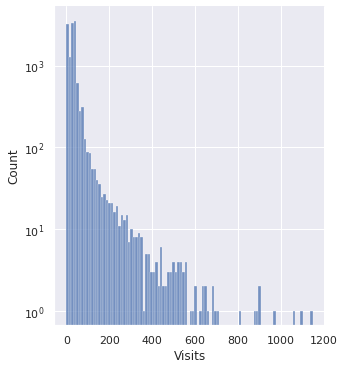

In [ ]:
AnalysisOfVisits(overall, 'Overall', 'mode', 100)

Information on  Baseline survey visits, with ranges focusing on the  mode
Mean Visits:  25.66
Median Visits:  34.0
Mode Visits:  [35.] with a count of: [6489]
Number of users with 0 visits:  248
Number of users with fewer than [35.] visits (but more than 0): 13100
Number of users with more than [35.] , fewer than [105.] visits: 4
Number of users with more than [105.] , fewer than [210.] visits: 0
Number of users with more than [210.] visits: 0


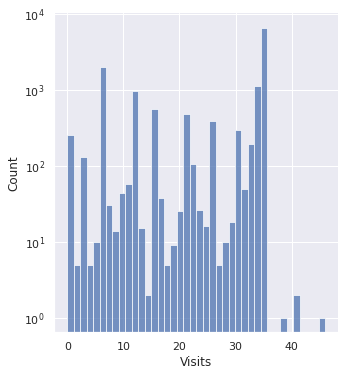

In [ ]:
AnalysisOfVisits(baseline, 'Baseline survey', 'mode', 40)

Information on  Daily Workout visits, with ranges focusing on the  mean
Mean Visits:  3.89
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [8409]
Number of users with 0 visits:  8409
Number of users with fewer than 4.0 visits (but more than 0): 3523
Number of users with more than 4.0 , fewer than 12.0 visits: 656
Number of users with more than 12.0 , fewer than 24.0 visits: 284
Number of users with more than 24.0 visits: 480


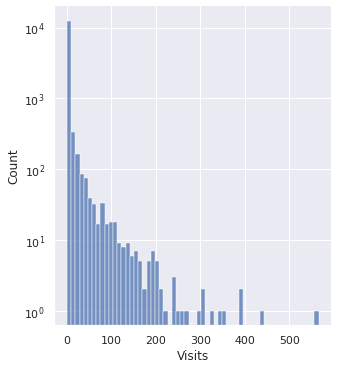

In [ ]:
AnalysisOfVisits(daily_workout, 'Daily Workout', 'mean', 60)

Information on  Activity visits, with ranges focusing on the  mean
Mean Visits:  4.14
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [7819]
Number of users with 0 visits:  7819
Number of users with fewer than 4.0 visits (but more than 0): 3425
Number of users with more than 4.0 , fewer than 12.0 visits: 1166
Number of users with more than 12.0 , fewer than 24.0 visits: 460
Number of users with more than 24.0 visits: 482


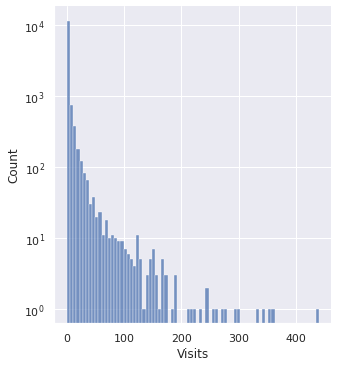

In [ ]:
AnalysisOfVisits(activity, 'Activity', 'mean', 80)

Information on  Remeasure visits, with ranges focusing on the  mean
Mean Visits:  3.54
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [11776]
Number of users with 0 visits:  11776
Number of users with fewer than 4.0 visits (but more than 0): 52
Number of users with more than 4.0 , fewer than 12.0 visits: 634
Number of users with more than 12.0 , fewer than 24.0 visits: 155
Number of users with more than 24.0 visits: 735


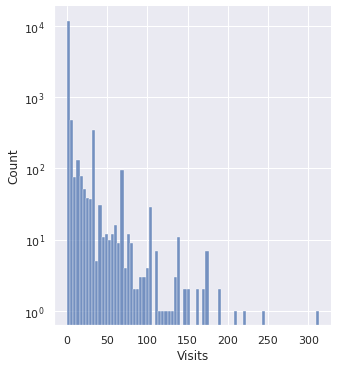

In [ ]:
AnalysisOfVisits(remeasure, 'Remeasure', 'mean', 80)

In [ ]:
df_wbw.loc[df_wbw['ALF']==49295][df_wbw['score_update_type']=='activity'].sort_values('start_time')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,start_time,end_time,score_update_type,dimension_name,sub_dimension_name,occasion,userscore,set_name,time,septile,ALF
18,2018-09-17 11:06:10,2018-09-17 11:06:10,activity,global,satisfaction_with_life,0,NaN,NaN,NaN,NaN,49295
17,2018-09-25 13:20:04,2018-09-25 13:20:04,activity,emotional,emotional_awareness,0,NaN,NaN,NaN,NaN,49295
16,2018-10-10 18:59:29,2018-10-10 18:59:29,activity,global,financial_security,0,NaN,NaN,NaN,NaN,49295
15,2018-10-15 18:47:58,2018-10-15 18:47:58,activity,work_related,work_stress,0,NaN,NaN,NaN,NaN,49295
40,2018-11-07 13:40:33,2018-11-07 13:40:33,activity,global,happiness,0,NaN,NaN,NaN,NaN,49295
...,...,...,...,...,...,...,...,...,...,...,...
264,2021-03-22 12:11:21,2021-03-22 12:11:21,activity,social,loneliness,0,NaN,NaN,NaN,NaN,49295
166,2021-04-13 13:54:37,2021-04-13 13:54:37,activity,work_related,work_stress,0,NaN,NaN,NaN,NaN,49295
210,2021-04-13 13:58:51,2021-04-13 13:58:51,activity,emotional,emotional_awareness,0,NaN,NaN,NaN,NaN,49295
233,2021-04-13 14:03:40,2021-04-13 14:03:40,activity,physical,energy_and_fatigue,0,NaN,NaN,NaN,NaN,49295


In [ ]:
df_wbw['ALF'].unique()

array([49295, 50218,   460, ..., 58242, 58269, 58273])

In [ ]:
df_wbw['score_update_type'].unique()

array(['activity', 'remeasure', 'Daily_workout', 'keepTrack', 'digDeeper',
       'baseline'], dtype=object)

In [ ]:
dummy = df_wbw.loc[df_wbw['ALF']==49295].groupby(['score_update_type'])['occasion'].max()

In [ ]:
dummy['Daily_workout']

0

In [ ]:
def NumberOfRemeasures(df, ALF_col):

  ''' This functions find the number of remeasures on the platform, if any, by 
  an individual. It finds the maximum input in the occasions column for each
  score update type and then takes the relevant value for remeasures. If there
  is not a value for remeasures, it is recorded as 0. 
  
  Inputs
  df : dataframe you are working with. eg df_wbw
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_wbw['ALF']

  Outputs
  occasions : an array of length of ALF_col.unique(), containing the number of 
  remeasures each individual has completed
  '''

  occasions = np.zeros([len(ALF_col.unique()), 1])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    occasion = df.loc[ALF_col == ALF_col.unique()[i]].groupby(['score_update_type'])['occasion'].max()
    if 'remeasure' in occasion.keys():
      occasions[i] = occasion['remeasure']
    else:
      occasions[i] = 0
  
  
    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")
  
  return occasions


In [ ]:
occasions = NumberOfRemeasures(df_wbw, df_wbw['ALF'])

Complete


In [ ]:
daily_workout

array([24., 24.,  5., ...,  0.,  1.,  0.])

###Employees Data Set

In [ ]:
df_employees.head()

,company_id,ALF,employee_is_manager,appuser,age,gender,manager
0,Emergency Services 1,22947.0,0.0,0,NaN,male,0.0
1,Property 1,50789.0,0.0,0,36.0,male,0.0
2,Consumer Services 1,1658.0,0.0,1,NaN,NaN,0.0
3,Emergency Services 2,57803.0,0.0,1,NaN,NaN,0.0
4,"Marketing, PR & Advertising 2",2844.0,0.0,1,NaN,female,0.0


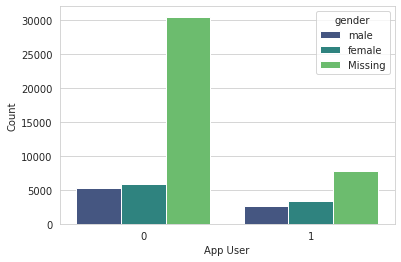

In [ ]:
df_employees['gender'] = df_employees['gender'].fillna('Missing')
sns.countplot(x = 'appuser', data = df_employees, hue_order = ['male', 'female', 'Missing'], hue = 'gender', palette = 'viridis').set(xlabel='App User', ylabel='Count')
plt.show()

In [ ]:
df_employees.loc[df_employees['gender'] == 'Missing'][df_employees['appuser'] == 0].shape[0], df_employees.loc[df_employees['gender'] != 'Missing'][df_employees['appuser'] == 0].shape[0]
11113/(30524+11113), df_employees.loc[df_employees['gender'] != 'Missing'].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(0.2669020342483848, 16972)

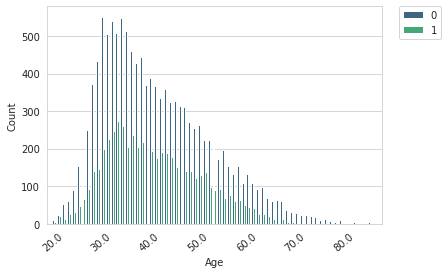

In [ ]:
age_appuser = sns.countplot(x = 'age', data = df_employees, hue = 'appuser', palette = 'viridis')
age_appuser.set(xlabel='Age', ylabel='Count')
age_appuser.set_xticklabels(age_appuser.get_xticklabels(), rotation=40, ha="right")
for ind, label in enumerate(age_appuser.get_xticklabels()):
    if (ind - 3) % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
df_employees['age'] = df_employees['age'].fillna('Missing')

In [ ]:
df_employees.loc[df_employees['age'] != 'Missing'].shape[0], df_employees.loc[df_employees['age'] == 'Missing'].shape[0]

(18127, 37172)

In [ ]:
n = 10
df_employees['age'][df_employees['appuser'] == 0].value_counts()[:n].index.tolist(), df_employees['age'][df_employees['appuser'] == 1].value_counts()[:n].index.tolist()

(['Missing', 28.0, 32.0, 30.0, 33.0, 31.0, 29.0, 34.0, 36.0, 27.0],
 ['Missing', 31.0, 32.0, 30.0, 34.0, 29.0, 36.0, 35.0, 33.0, 28.0])

In [ ]:
df_employees.loc[df_employees['age'] == 31.0][df_employees['appuser'] == 1].shape[0], df_employees.loc[df_employees['age'] == 32.0][df_employees['appuser'] == 1].shape[0], df_employees.loc[df_employees['age'] == 30.0][df_employees['appuser'] == 1].shape[0], df_employees.loc[df_employees['age'] == 34.0][df_employees['appuser'] == 1].shape[0], df_employees.loc[df_employees['age'] == 29.0][df_employees['appuser'] == 1].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(275, 261, 247, 236, 226)

### Behaviours Data Set

In [ ]:
df_behaviours.head()

,behaviour,issue_number,life_event_name,content_id,external_service,support,tip_exercise,content_name,content_source,content_media_type,date_of_behaviour,topic_name,topic_custom_name,external_service_link,ALF
0,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-12 09:29:51,NaN,NaN,NaN,290
1,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-21 10:34:39,NaN,NaN,NaN,290
2,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-12 09:29:02,NaN,NaN,NaN,290
3,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-12 09:27:14,NaN,NaN,NaN,290
4,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-22 13:03:23,NaN,NaN,NaN,290


In [ ]:
#(df_behaviours.loc[df_behaviours['ALF']==50228].sort_values('date_of_behaviour'))
trial = df_behaviours['date_of_behaviour'].loc[df_behaviours['ALF']==50228].dt.date.unique()#.map(lambda t: t.date()).unique()
#pd.Series([d.date() for d in df.index]).unique()

In [ ]:
trial.sort()

In [ ]:
boop = np.array([(trial[1] -trial[0]).days, (trial[2] - trial[1]).days])
np.mean(boop)

10.5

In [ ]:
time = np.empty((len(trial) - 1,))
for t in range(len(trial) - 1):
  time[t] = (trial[t+1] - trial[t]).days
mean = np.mean(time)
std = np.std(time)

In [ ]:
def TimeBetweenInteractions(date_col, ALF_col):

  ''' This function finds the mean and std and total days a user has interacted 
  with the platform. It works by taking the list of unique dates for each user
  (ie so not time too, just the day) and sorting them and finding the difference
  in time between each visit, and from there getting a mean and std.
  This helps to give a sense of the regularity and frequency of how an individual
  makes use of the app. 
  For example, if a user has a mean of around 7 days, and a low std, that would 
  indicate a user regularly accessing the app once a week. On the other hand, a 
  user with a high mean and high std would suggest they infrequently and 
  sporadically visit the app.

  Inputs
  date_col : column of dataframe containing the timestamps of each visit. 
  eg df_behaviours['date_of_behaviour']
  ALF_col : column of ALF tags. eg df_behaviours['ALF']

  Outputs
  overall : matrix len unique ALFs, 3
  total_days : total unique days visited platform
  mean : mean of gap between visits
  std: std of gap between visits
  '''

  overall = np.empty([len(ALF_col.unique()), 3])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)

    holder = date_col.loc[ALF_col == ALF_col.unique()[i]].dt.date.unique()
    holder.sort()
    time = np.empty((len(holder) - 1,))
    for t in range(len(holder) - 1):
      time[t] = (holder[t+1] - holder[t]).days

    mean = np.round(np.mean(time), 2)
    std = np.round(np.std(time), 2)

    overall[i,0] = len(holder)
    overall[i,1] = mean
    overall[i,2] = std  

    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")

  total_days = overall[:,0]
  mean = overall[:,1]
  std = overall[:,2]

  return overall, total_days, mean, std

In [ ]:
overall, total_days, mean, std = TimeBetweenInteractions(df_behaviours['date_of_behaviour'], df_behaviours['ALF'])

Current Progress: 100.0 %


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
overall_wbw, total_days_wbw, mean_wbw, std_wbw = TimeBetweenInteractions(df_wbw['start_time'], df_wbw['ALF'])

Complete


In [ ]:
intersection = set(df_behaviours['ALF'].unique()).intersection(df_wbw['ALF'].unique())

In [ ]:
df_behaviours.loc[df_behaviours['ALF'] == 50228][df_behaviours['behaviour'] == 'read_content'].head()#[df_behaviours['content_media_type']== 'article']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,behaviour,issue_number,life_event_name,content_id,external_service,support,tip_exercise,content_name,content_source,content_media_type,date_of_behaviour,topic_name,topic_custom_name,external_service_link,ALF
881,read_content,NaN,NaN,5d160eb6e490c500076699a3,NaN,NaN,NaN,What it's like to be a dad with arthritis,dailyBoost,article,2019-07-01 16:01:34,NaN,NaN,NaN,50228
882,read_content,NaN,NaN,5ccc118b8d84617b50d631d5,NaN,NaN,NaN,The Key to Good Luck Is an Open Mind,backend,article,2019-05-18 14:31:57,NaN,NaN,NaN,50228
883,read_content,NaN,NaN,5cdebc05f5a984710e17e998,NaN,NaN,NaN,"10 Traits of a Great Manager, According to Goo...",backend,article,2019-05-24 11:11:58,NaN,NaN,NaN,50228
884,read_content,NaN,NaN,5c95e8bab075b3d90b021fda,NaN,NaN,NaN,How to switch off from work,backend,article,2019-03-24 07:49:01,NaN,NaN,NaN,50228
885,read_content,NaN,NaN,5c11422cad383fedaef0679d,NaN,NaN,NaN,Simple Tips to Rejuvenate Your Mind and Body,programList,article,2020-03-04 08:35:39,NaN,NaN,NaN,50228


In [ ]:
df_behaviours.loc[df_behaviours['ALF'] == 4763].sort_values('date_of_behaviour') #50228

,behaviour,issue_number,life_event_name,content_id,external_service,support,tip_exercise,content_name,content_source,content_media_type,date_of_behaviour,topic_name,topic_custom_name,external_service_link,ALF
123740,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22 05:17:08,NaN,NaN,NaN,4763
123743,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-16 20:26:46,NaN,NaN,NaN,4763
123742,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-16 21:01:43,NaN,NaN,NaN,4763
123741,NewsletterIssue,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-22 18:51:39,NaN,NaN,NaN,4763


In [ ]:
df_behaviours['behaviour'].unique()

array(['NewsletterIssue', 'open_app', 'read_content', 'monthly_report',
       'accessed_exercise', 'accessed_service', 'follow_life_event',
       'unfollow_life_event', 'completed_the_wheel', 'weekly_report',
       'accessed_support'], dtype=object)

In [ ]:
labels = df_behaviours['behaviour'].unique().tolist()
counts = np.empty((df_behaviours['behaviour'].nunique()))
for bev in df_behaviours['behaviour'].unique():
  counts[df_behaviours['behaviour'].unique().tolist().index(bev)] = df_behaviours.loc[df_behaviours['behaviour'] == bev].shape[0]

[Text(0, 0.5, 'Behavioural Instance'), Text(0.5, 0, 'Count')]

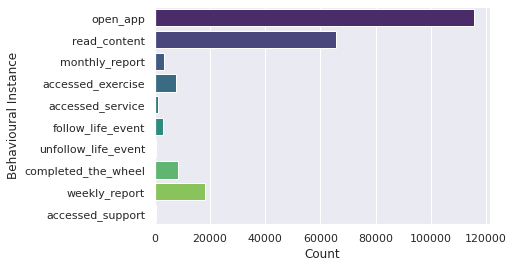

In [ ]:
sns.color_palette(palette = 'viridis', n_colors = 1)
fig = sns.barplot(y = labels[1:], x = counts[1:], palette= 'viridis')
fig.set(xlabel='Count', ylabel='Behavioural Instance')

In [ ]:
labels1 = df_behaviours['behaviour'].unique().tolist()
counts1 = np.empty((df_behaviours['behaviour'].nunique()))
for bev in df_behaviours['behaviour'].unique():
  counts1[df_behaviours['behaviour'].unique().tolist().index(bev)] = df_behaviours.loc[df_behaviours['ALF'].isin(intersection) == True][df_behaviours['behaviour'] == bev].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will

[Text(0, 0.5, 'Behavioural Instance'), Text(0.5, 0, 'Count')]

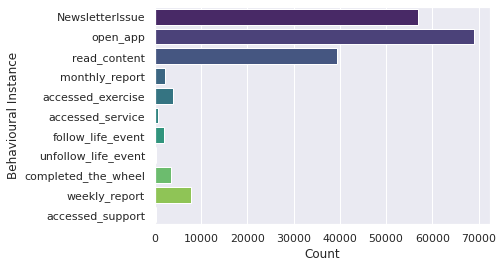

In [ ]:
sns.color_palette(palette = 'viridis', n_colors = 1)
fig1 = sns.barplot(y = labels1, x = counts1, palette= 'viridis')
fig1.set(xlabel='Count', ylabel='Behavioural Instance')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Content Type')]

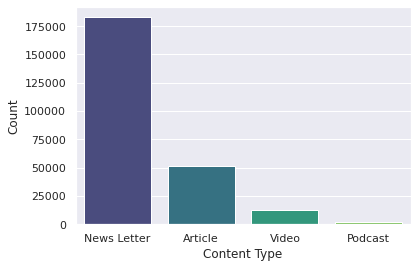

In [ ]:
xaxis = ['News Letter','Article', 'Video', 'Podcast']
yaxis = [df_behaviours.loc[df_behaviours['behaviour'] == 'NewsletterIssue'].shape[0],df_behaviours.loc[df_behaviours['content_media_type'] == 'article'].shape[0], df_behaviours.loc[df_behaviours['content_media_type'] == 'video'].shape[0], df_behaviours.loc[df_behaviours['content_media_type'] == 'podcast'].shape[0]]
fig2 = sns.barplot(y = yaxis, x = xaxis, palette= 'viridis')
fig2.set(xlabel='Content Type', ylabel='Count')

In [ ]:
#need to get all of the ALFs seperate, and then find the ones where shape of read_content = articles etc == 0

In [ ]:
def ContentType(df, ALF_col, content, behaviour):

  ''' This function finds the counts of different type of content that each
  user interacts with. Also has another output that just contains users that only
  have newsletter interactions -- not yet need to put it in.. 
  
  Inputs
  df : dataframe you are working with. eg df_behaviours
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_behaviours['ALF']
  content: column within the dataframe that contains the type of content
  of that interaction. one of 4: article, video, podcast. 
  eg. df_behaviours['content_media_type']
  behaviour: column within the dataframe that contains the behvaiour type
  of that interaction. here, just use behaviour type 'NewsletterIssue', but can
  be extended to all of them with small modification to this function
  eg. df_behaviours['behaviour']

  Outputs

  '''

  content_type1 = np.empty([len(ALF_col.unique()), 5])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    content_type1[i][0] = df.loc[ALF_col == ALF_col.unique()[i]].shape[0]
    content_type1[i][1] = df.loc[ALF_col == ALF_col.unique()[i]][content == 'article'].shape[0]
    content_type1[i][2] = df.loc[ALF_col == ALF_col.unique()[i]][content == 'video'].shape[0]
    content_type1[i][3] = df.loc[ALF_col == ALF_col.unique()[i]][content == 'podcast'].shape[0]
    content_type1[i][4] = df.loc[ALF_col == ALF_col.unique()[i]][behaviour == 'NewsletterIssue'].shape[0]

    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")

  overall = content_type1[:,0]
  article = content_type1[:,1]
  video = content_type1[:,2]
  podcast = content_type1[:,3]
  newsletter = content_type1[:,4]

  return content_type1, overall, article, video, podcast, newsletter

In [ ]:
content_type, overall, article, video, podcast, newsletter = ContentType(df_behaviours, df_behaviours['ALF'], df_behaviours['content_media_type'], df_behaviours['behaviour'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Current Progress: 100.0 %


In [ ]:
overall

array([  5., 785.,  90., ...,   2.,   1.,   1.])

In [ ]:
def visitanalysis(visits, visittext, typeofaverage, bins):

  ''' This function takes the output of NumberOfInteractionsPerPerson, or a
  column of the TypeOfInteractionPerPerson and analyses it. This better helps 
  to understand the data, and only is done in two functions as the initial 
  functions can take some time.

  Inputs:
  visits: a column of content visits per person
  visittext: same as content, but in '' so the name can be printed
  typeofaverage: choose from 'mean', 'median', or 'mode', and this will be plugged 
  into the ranges part of the function. I have found for the overall, mode works
  well, but for the others, perhaps the mean or median would work better.
  bins: no. of bars you want to see on the plot.

  Outputs:
  Mean, median, mode: Self-explanatory, but mean visits etc of the users.
  No. of users within different ranges of visits. Here I have chosen the ranges
  to be 0, value of mode, mode*3, mode*6, as it gives a balanced view. can also
  be mean or median - for the specific columns, mean is more useful, since all
  their modes are 0. 
  Plots distplot of distribution, after sorting the visits from high to low.
  '''

  mean = np.mean(visits)
  median = np.median(visits)
  mode = stats.mode(visits)

  print("Information on ", visittext, ", with ranges focusing on the ", typeofaverage)

  print("Mean Visits: ", np.round(mean,2))
  print("Median Visits: ", median)
  print("Mode Visits: ", mode[0] , "with a count of:", mode[1])

  if typeofaverage == 'mode':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", mode[0] , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= mode[0])))
    print("Number of users with more than" , mode[0], ", fewer than", (mode[0]*3), "visits:" ,np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)))
    print("Number of users with more than", (mode[0]*3), ", fewer than" , (mode[0]*6) , "visits:" ,np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)))
    print("Number of users with more than", (mode[0]*6), "visits:" ,np.count_nonzero((mode[0]*6 < visits)))
  
    #modes = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= mode[0])), np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)), np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)) , np.count_nonzero((mode[0]*6 < visits))])

  elif typeofaverage == 'mean':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(mean) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(mean))))
    print("Number of users with more than" , np.round(mean), ", fewer than", (np.round(mean)*3), "visits:" ,np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)))
    print("Number of users with more than", (np.round(mean)*3), ", fewer than" , (np.round(mean)*6) , "visits:" ,np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)))
    print("Number of users with more than", (np.round(mean)*6), "visits:" ,np.count_nonzero((np.round(mean)*6 < visits)))    

    #means = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(mean))), np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)), np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)), np.round(mean)*6 < visits))])

  elif typeofaverage == 'median':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(median) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(median))))
    print("Number of users with more than" , np.round(median), ", fewer than", (np.round(median)*3), "visits:" ,np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)))
    print("Number of users with more than", (np.round(median)*3), ", fewer than" , (np.round(median)*6) , "visits:" ,np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)))
    print("Number of users with more than", (np.round(median)*6), "visits:" ,np.count_nonzero((np.round(median)*6 < visits)))      

    #medians = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(median))), np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)), np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)), np.round(median)*6 < visits))])

  fig2 = sns.displot(data = ((np.sort(visits.T)).T), bins = bins, kde = False, palette = 'viridis')
  fig2.set_axis_labels('Visits', 'Count')
  fig2.set(yscale = 'log')

In [ ]:
def AnalysisOfVisits(visits, visittext, typeofaverage, bins):

  ''' This function takes the output of NumberOfInteractionsPerPerson, or a
  column of the TypeOfInteractionPerPerson and analyses it. This better helps 
  to understand the data, and only is done in two functions as the initial 
  functions can take some time.

  Inputs:
  visits: a column of content visits per person
  visittext: same as content, but in '' so the name can be printed
  typeofaverage: choose from 'mean', 'median', or 'mode', and this will be plugged 
  into the ranges part of the function. I have found for the overall, mode works
  well, but for the others, perhaps the mean or median would work better.
  bins: no. of bars you want to see on the plot.

  Outputs:
  Mean, median, mode: Self-explanatory, but mean visits etc of the users.
  No. of users within different ranges of visits. Here I have chosen the ranges
  to be 0, value of mode, mode*3, mode*6, as it gives a balanced view. can also
  be mean or median - for the specific columns, mean is more useful, since all
  their modes are 0. 
  Plots distplot of distribution, after sorting the visits from high to low.
  '''

  mean = np.mean(visits)
  median = np.median(visits)
  mode = stats.mode(visits)

  print("Information on ", visittext, ", with ranges focusing on the ", typeofaverage)

  print("Mean Visits: ", np.round(mean,2))
  print("Median Visits: ", median)
  print("Mode Visits: ", mode[0] , "with a count of:", mode[1])

  if typeofaverage == 'mode':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", mode[0] , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= mode[0])))
    print("Number of users with more than" , mode[0], ", fewer than", (mode[0]*3), "visits:" ,np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)))
    print("Number of users with more than", (mode[0]*3), ", fewer than" , (mode[0]*6) , "visits:" ,np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)))
    print("Number of users with more than", (mode[0]*6), "visits:" ,np.count_nonzero((mode[0]*6 < visits)))
  
    #modes = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= mode[0])), np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)), np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)) , np.count_nonzero((mode[0]*6 < visits))])

  elif typeofaverage == 'mean':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(mean) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(mean))))
    print("Number of users with more than" , np.round(mean), ", fewer than", (np.round(mean)*3), "visits:" ,np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)))
    print("Number of users with more than", (np.round(mean)*3), ", fewer than" , (np.round(mean)*6) , "visits:" ,np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)))
    print("Number of users with more than", (np.round(mean)*6), "visits:" ,np.count_nonzero((np.round(mean)*6 < visits)))    

    #means = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(mean))), np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)), np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)), np.round(mean)*6 < visits))])

  elif typeofaverage == 'median':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(median) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(median))))
    print("Number of users with more than" , np.round(median), ", fewer than", (np.round(median)*3), "visits:" ,np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)))
    print("Number of users with more than", (np.round(median)*3), ", fewer than" , (np.round(median)*6) , "visits:" ,np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)))
    print("Number of users with more than", (np.round(median)*6), "visits:" ,np.count_nonzero((np.round(median)*6 < visits)))      

    #medians = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(median))), np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)), np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)), np.round(median)*6 < visits))])

  fig2 = sns.displot(data = ((np.sort(visits.T)).T), bins = bins, kde = False, palette = 'viridis')
  fig2.set_axis_labels('Visits', 'Count')
  fig2.set(yscale = 'log')


Information on  overall content use , with ranges focusing on the  mean
Mean Visits:  16.35
Median Visits:  6.0
Mode Visits:  [1.] with a count of: [4230]
Number of users with 0 visits:  0
Number of users with fewer than 16.0 visits (but more than 0): 19422
Number of users with more than 16.0 , fewer than 48.0 visits: 3891
Number of users with more than 48.0 , fewer than 96.0 visits: 960
Number of users with more than 96.0 visits: 642


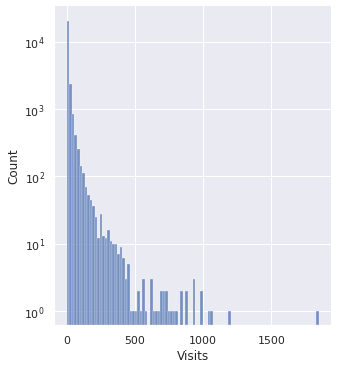

In [ ]:
visitanalysis(overall, 'overall content use', 'mean', 100)

Information on  overall content use , with ranges focusing on the  mode
Mean Visits:  16.35
Median Visits:  6.0
Mode Visits:  [1.] with a count of: [4230]
Number of users with 0 visits:  0
Number of users with fewer than [1.] visits (but more than 0): 4230
Number of users with more than [1.] , fewer than [3.] visits: 4902
Number of users with more than [3.] , fewer than [6.] visits: 4295
Number of users with more than [6.] visits: 11488


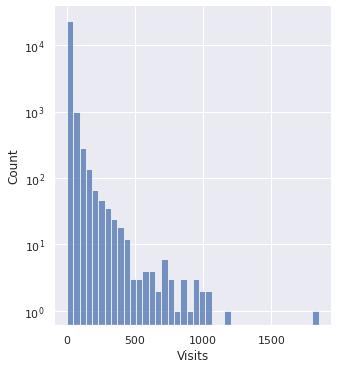

In [ ]:
visitanalysis(overall, 'overall content use', 'mode', 40)

Information on  number of articles accessed , with ranges focusing on the  mean
Mean Visits:  2.08
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [19355]
Number of users with 0 visits:  19355
Number of users with fewer than 2.0 visits (but more than 0): 2666
Number of users with more than 2.0 , fewer than 6.0 visits: 1374
Number of users with more than 6.0 , fewer than 12.0 visits: 630
Number of users with more than 12.0 visits: 890


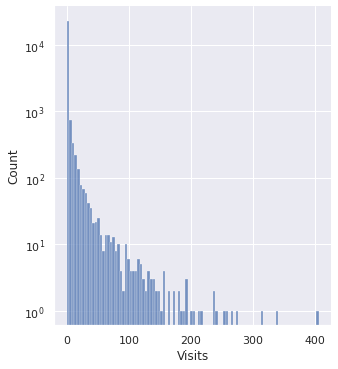

In [ ]:
visitanalysis(article, 'number of articles accessed', 'mean', 100)

Information on  number of articles accessed , with ranges focusing on the  mode
Mean Visits:  2.08
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [19355]
Number of users with 0 visits:  19355
Number of users with fewer than [0.] visits (but more than 0): 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] visits: 5560


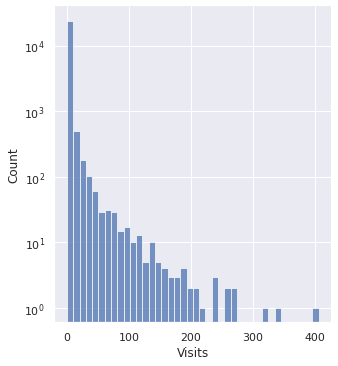

In [ ]:
visitanalysis(article, 'number of articles accessed', 'mode', 40)

Information on  number of videos watched , with ranges focusing on the  mean
Mean Visits:  0.5
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [22429]
Number of users with 0 visits:  22429
Number of users with fewer than 0.0 visits (but more than 0): 0
Number of users with more than 0.0 , fewer than 0.0 visits: 0
Number of users with more than 0.0 , fewer than 0.0 visits: 0
Number of users with more than 0.0 visits: 2486


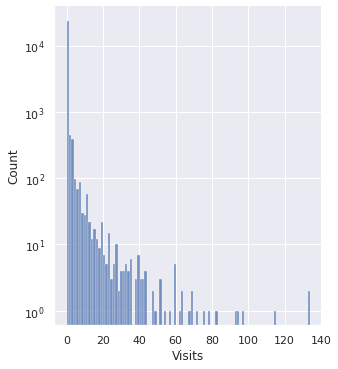

In [ ]:
visitanalysis(video, 'number of videos watched', 'mean', 100)

Information on  number of videos watched , with ranges focusing on the  mode
Mean Visits:  0.5
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [22429]
Number of users with 0 visits:  22429
Number of users with fewer than [0.] visits (but more than 0): 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] visits: 2486


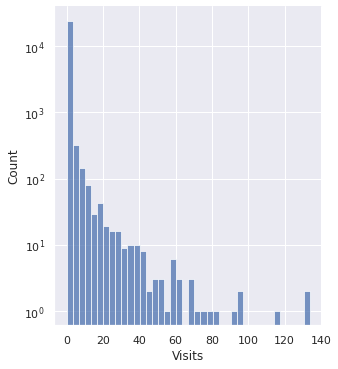

In [ ]:
visitanalysis(video, 'number of videos watched', 'mode', 40)

Information on  number of podcasts listened to , with ranges focusing on the  mean
Mean Visits:  0.07
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [23967]
Number of users with 0 visits:  23967
Number of users with fewer than 0.0 visits (but more than 0): 0
Number of users with more than 0.0 , fewer than 0.0 visits: 0
Number of users with more than 0.0 , fewer than 0.0 visits: 0
Number of users with more than 0.0 visits: 948


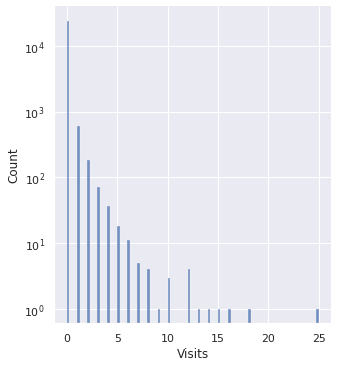

In [ ]:
visitanalysis(podcast, 'number of podcasts listened to', 'mean', 100)

Information on  number of podcasts listened to , with ranges focusing on the  mode
Mean Visits:  0.07
Median Visits:  0.0
Mode Visits:  [0.] with a count of: [23967]
Number of users with 0 visits:  23967
Number of users with fewer than [0.] visits (but more than 0): 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] visits: 948


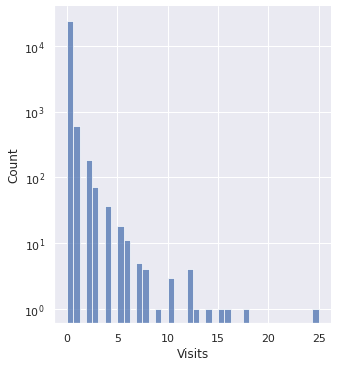

In [ ]:
visitanalysis(podcast, 'number of podcasts listened to', 'mode', 40)

Information on  number of newsletters read , with ranges focusing on the  mean
Mean Visits:  7.34
Median Visits:  2.0
Mode Visits:  [0.] with a count of: [8115]
Number of users with 0 visits:  8115
Number of users with fewer than 7.0 visits (but more than 0): 10786
Number of users with more than 7.0 , fewer than 21.0 visits: 4046
Number of users with more than 21.0 , fewer than 42.0 visits: 1220
Number of users with more than 42.0 visits: 748


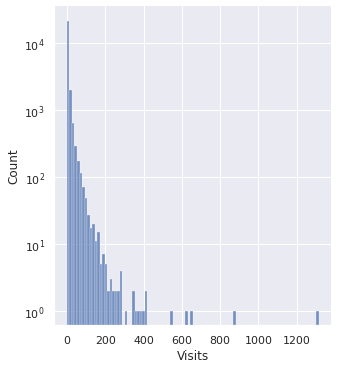

In [ ]:
visitanalysis(newsletter, 'number of newsletters read', 'mean', 100)

Information on  number of newsletters read , with ranges focusing on the  mode
Mean Visits:  7.34
Median Visits:  2.0
Mode Visits:  [0.] with a count of: [8115]
Number of users with 0 visits:  8115
Number of users with fewer than [0.] visits (but more than 0): 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] , fewer than [0.] visits: 0
Number of users with more than [0.] visits: 16800


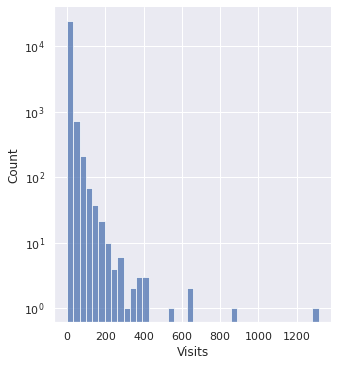

In [ ]:
visitanalysis(newsletter, 'number of newsletters read', 'mode', 40)

### Item level Data set

In [ ]:
df_itemlevel.loc[df_itemlevel['ALF'] == 57113][df_itemlevel['score_update_type']=='keepTrack'].sort_values('response_created_at')[60:70]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,response_created_at,score_update_type,question,answer,set_name,answer_score,ALF
5392,2019-12-16 16:25:07,keepTrack,People can tell when I$m happy because I... (s...,Make jokes or positive statements,KT1 Happiness,1,57113
5067,2019-12-29 09:43:43,keepTrack,I appreciate the small things in life.,Mostly true,KT2 Happiness,5,57113
5467,2019-12-29 09:43:43,keepTrack,"When somebody helps me out, I thank them and l...",Completely true,KT2 Happiness,6,57113
4828,2019-12-29 09:43:43,keepTrack,I often take stock and reflect on the things I...,Mostly true,KT2 Happiness,5,57113
5181,2019-12-29 09:43:43,keepTrack,"During difficult times, I draw strength and co...",Completely true,KT2 Happiness,6,57113
4903,2019-12-29 09:45:26,keepTrack,My bedroom environment allows me to prepare qu...,Agree,KT4 Sleep,5,57113
5407,2019-12-29 09:45:26,keepTrack,I avoid the use of mobile phones and other scr...,This is somewhat difficult for me,KT4 Sleep,3,57113
4977,2019-12-29 09:45:26,keepTrack,I only use my bed for sleeping and sex.,Completely true,KT4 Sleep,6,57113
5060,2019-12-29 09:45:26,keepTrack,I avoid caffeine and other stimulants for at l...,This is easy for me,KT4 Sleep,5,57113
5200,2019-12-29 09:45:26,keepTrack,I usually go to bed more than 3 hours after ea...,Always,KT4 Sleep,6,57113


In [ ]:
df_itemlevel.head()

,response_created_at,score_update_type,question,answer,set_name,answer_score,ALF
0,2020-04-22 19:42:51,remeasure,I expect to do well in most things that I try,Somewhat untrue,Accepting yourself: Set A,3,49295
1,2021-05-12 15:16:48,Daily_workout,How often do you feel so preoccupied with your...,Always,Anxiety: Set F,1,49295
2,2021-02-01 12:02:48,remeasure,"Over the last few months, how often did you fe...",Once or twice a month,Addictive behaviour: Set A,5,49295
3,2021-01-29 08:14:42,remeasure,I usually know what makes other people tick.,Mostly true,Understanding others: Set D,5,49295
4,2021-01-06 13:45:39,remeasure,"When I think about it, my life could be a lot ...",Mostly untrue,Life satisfaction: Set A,5,49295


In [ ]:
df_itemlevel.loc[df_itemlevel['ALF'] == 57113]

,response_created_at,score_update_type,question,answer,set_name,answer_score,ALF
4704,2020-10-01 17:40:23,remeasure,I compare how my body looks against the appear...,Completely Untrue,Body image: Set A,6,57113
4705,2020-12-24 08:21:17,Daily_workout,I could probably show more kindness to others ...,3,Kindness to Others: Set D,3,57113
4706,2021-01-09 10:05:14,Daily_workout,"At work, I tend to sit for most of the time wi...",Somewhat true,Exercise and physical activity: Set D,3,57113
4707,2020-10-01 17:40:23,remeasure,I feel bad if I don't have some social plans f...,Mostly untrue,Independence and autonomy: Set A,5,57113
4708,2020-09-21 11:36:00,Daily_workout,I get a sense of independence and personal con...,Mostly true,Work satisfaction: Set H,5,57113
...,...,...,...,...,...,...,...
5468,2020-12-01 08:25:52,Daily_workout,When I’m faced with a challenging situation...,3,Managing emotions: Set L,3,57113
5469,2020-03-09 08:24:23,Daily_workout,It$s hard for me to relax when I$m not working.,Completely untrue,Work-life balance: Set E,6,57113
5470,2019-08-27 07:06:38,Daily_workout,It$s easy to speak to my manager about mental ...,Slightly agree,Work relationships: Set C,4,57113
5471,2021-05-24 16:48:27,keepTrack,"Over recent weeks, it seems to take a lot of e...",Slightly agree,KT5 Depression,3,57113


In [ ]:
#df_itemlevel.loc[df_itemlevel['ALF'] == 57113]
#df_itemlevel['answer_score'][df_itemlevel['ALF'] == 57113][df_itemlevel['score_update_type']=='Daily_workout'].shape[0]
df_itemlevel.loc[df_itemlevel['ALF'] == 57113][df_itemlevel['score_update_type']=='keepTrack'].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


253

In [ ]:
df_itemlevel['score_update_type'].unique() #205450, 156975, 90564, 43811, 1680084

array(['remeasure', 'Daily_workout', 'keepTrack', 'digDeeper', 'baseline'],
      dtype=object)

In [ ]:
df_itemlevel.loc[df_itemlevel['score_update_type']=='baseline'].shape[0]#.unique()

1680084

In [ ]:
df_itemlevel['ALF'].nunique()

13205

In [ ]:
df_itemlevel.shape[0]

2176884

In [ ]:
len(set(df_itemlevel['ALF'].unique()).intersection(df_wbw['ALF'].unique())), df_wbw['ALF'].nunique()

(13205, 13352)

In [ ]:
def NumberOfQuestionsAnswered(df, ALF_col, content):

  ''' This function finds the counts of different type of question that each
  user interacts with. Also has another output that just contains users that only
  have newsletter interactions -- not yet need to put it in.. 
  
  Inputs
  df : dataframe you are working with. eg df_itemlevel
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_itemlevel['ALF']
  content: column within the dataframe that contains the type of content
  of that interaction. one of 4: article, video, podcast. 
  eg. df_behaviours['content_media_type']

  Outputs

  '''

  content_type = np.empty([len(ALF_col.unique()), 5])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    content_type[i][0] = df[ALF_col == ALF_col.unique()[i]][content == 'remeasure'].shape[0]
    content_type[i][1] = df[ALF_col == ALF_col.unique()[i]][content == 'Daily_workout'].shape[0]
    content_type[i][2] = df[ALF_col == ALF_col.unique()[i]][content == 'keepTrack'].shape[0]
    content_type[i][3] = df[ALF_col == ALF_col.unique()[i]][content == 'digDeeper'].shape[0]
    content_type[i][4] = df[ALF_col == ALF_col.unique()[i]][content == 'baseline'].shape[0]

    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")

  remeasure = content_type[:,0]
  dailyworkout = content_type[:,1]
  keeptrack = content_type[:,2]
  digdeeper = content_type[:,3]
  baseline = content_type[:,4]

  return remeasure, dailyworkout, keeptrack, digdeeper, baseline

In [ ]:
remeasure, dailyworkout, keeptrack, digdeeper, baseline = NumberOfQuestionsAnswered(df_itemlevel, df_itemlevel['ALF'],df_itemlevel['score_update_type'])

Complete


In [ ]:
def TypeOfContent(df, ALF_col, content, answer_score):

  ''' This function finds the counts of different type of content that each
  user interacts with. Also has another output that just contains users that only
  have newsletter interactions -- not yet need to put it in.. 
  
  Inputs
  df : dataframe you are working with. eg df_itemlevel
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_itemlevel['ALF']
  content: column within the dataframe that contains the type of content
  of that interaction. one of 4: article, video, podcast. 
  eg. df_behaviours['content_media_type']
  answer_score: column within the dataframe that contains the answer score
  of that interaction.
  eg. df_itemlevel['answer_score']

  Outputs

  '''

  content_type = np.empty([len(ALF_col.unique()), 10])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    content_type[i][0] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'remeasure'].mean()
    content_type[i][1] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'Daily_workout'].mean()
    content_type[i][2] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'keepTrack'].mean()
    content_type[i][3] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'digDeeper'].mean()
    content_type[i][4] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'baseline'].mean()
    content_type[i][5] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'remeasure'].std()
    content_type[i][6] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'Daily_workout'].std()
    content_type[i][7] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'keepTrack'].std()
    content_type[i][8] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'digDeeper'].std()
    content_type[i][9] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'baseline'].std()

    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")

  overall = content_type[:,0]
  article = content_type[:,1]
  video = content_type[:,2]
  podcast = content_type[:,3]
  newsletter = content_type[:,4]
  overallstd = content_type[:,5]
  articlestd = content_type[:,6]
  videostd = content_type[:,7]
  podcaststd = content_type[:,8]
  newsletterstd = content_type[:,9]

  return content_type, overall, article, video, podcast, newsletter, overallstd, articlestd, videostd, podcaststd, newsletterstd

In [ ]:
remes, dwork, track, ddeep, base, remesstd, dworkstd, trackstd, ddeepstd, basestd = TypeOfContent(df_itemlevel, df_itemlevel['ALF'],df_itemlevel['score_update_type'], df_itemlevel['answer_score'])

Complete


ValueError: ignored

In [ ]:
def TypeOfContent(df, ALF_col, content, answer_score):

  ''' This function finds the counts of different type of content that each
  user interacts with. Also has another output that just contains users that only
  have newsletter interactions -- not yet need to put it in.. 
  
  Inputs
  df : dataframe you are working with. eg df_itemlevel
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_itemlevel['ALF']
  content: column within the dataframe that contains the type of content
  of that interaction. one of 4: article, video, podcast. 
  eg. df_behaviours['content_media_type']
  answer_score: column within the dataframe that contains the answer score
  of that interaction.
  eg. df_itemlevel['answer_score']

  Outputs

  '''

  content_typee = np.empty([len(ALF_col.unique())])

  for i in range(len(ALF_col.unique())):
  
    clear_output(wait = True)
  
    content_typee[i] = answer_score[ALF_col == ALF_col.unique()[i]][content == 'digDeeper'].mean()

    print("Current Progress:", np.round(((i) / len(ALF_col.unique())) * 100, 2), "%")
    if np.round(((i) / len(ALF_col.unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")

  return content_typee

In [ ]:
baseline = TypeOfContent(df_itemlevel, df_itemlevel['ALF'], df_itemlevel['score_update_type'], df_itemlevel['answer_score'])

In [ ]:
remeasure = TypeOfContent(df_itemlevel, df_itemlevel['ALF'], df_itemlevel['score_update_type'], df_itemlevel['answer_score'])

In [ ]:
digdeeper = TypeOfContent(df_itemlevel, df_itemlevel['ALF'], df_itemlevel['score_update_type'], df_itemlevel['answer_score'])

In [ ]:
np.nanmean(digdeeper)

In [ ]:
means = [np.nanmean(remeasure), np.nanmean(daily), np.nanmean(keeptrack), np.nanmean(dig), np.nanmean(baseline)]
labels = ['Remeasure', 'Daily Workout', 'Keep Track', 'Dig Deeper', 'Baseline']
stds = [np.nanstd(remeasure), np.nanstd(daily), np.nanstd(keeptrack), np.nanstd(dig), np.nanstd(baseline)]
fig1 = sns.barplot(x = labels, y = means, yerr = stds, palette='viridis')
fig1.set(xlabel='Update Type', ylabel='Mean')
fig1.set_xticklabels(labels, rotation=15)

In [ ]:
def AnalysisOfVisits(visits, visittext, typeofaverage, bins):

  ''' This function takes the output of NumberOfInteractionsPerPerson, or a
  column of the TypeOfInteractionPerPerson and analyses it. This better helps 
  to understand the data, and only is done in two functions as the initial 
  functions can take some time.

  Inputs:
  visits: a column of content visits per person
  visittext: same as content, but in '' so the name can be printed
  typeofaverage: choose from 'mean', 'median', or 'mode', and this will be plugged 
  into the ranges part of the function. I have found for the overall, mode works
  well, but for the others, perhaps the mean or median would work better.
  bins: no. of bars you want to see on the plot.

  Outputs:
  Mean, median, mode: Self-explanatory, but mean visits etc of the users.
  No. of users within different ranges of visits. Here I have chosen the ranges
  to be 0, value of mode, mode*3, mode*6, as it gives a balanced view. can also
  be mean or median - for the specific columns, mean is more useful, since all
  their modes are 0. 
  Plots distplot of distribution, after sorting the visits from high to low.
  '''

  mean = np.mean(visits)
  median = np.median(visits)
  mode = stats.mode(visits)

  print("Information on ", visittext, ", with ranges focusing on the ", typeofaverage)

  print("Mean Visits: ", np.round(mean,2))
  print("Median Visits: ", median)
  print("Mode Visits: ", mode[0] , "with a count of:", mode[1])

  if typeofaverage == 'mode':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", mode[0] , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= mode[0])))
    print("Number of users with more than" , mode[0], ", fewer than", (mode[0]*3), "visits:" ,np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)))
    print("Number of users with more than", (mode[0]*3), ", fewer than" , (mode[0]*6) , "visits:" ,np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)))
    print("Number of users with more than", (mode[0]*6), "visits:" ,np.count_nonzero((mode[0]*6 < visits)))
  
    #modes = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= mode[0])), np.count_nonzero((mode[0] < visits) & (visits <= mode[0]*3)), np.count_nonzero((mode[0]*3 < visits) & (visits <= mode[0]*6)) , np.count_nonzero((mode[0]*6 < visits))])

  elif typeofaverage == 'mean':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(mean) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(mean))))
    print("Number of users with more than" , np.round(mean), ", fewer than", (np.round(mean)*3), "visits:" ,np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)))
    print("Number of users with more than", (np.round(mean)*3), ", fewer than" , (np.round(mean)*6) , "visits:" ,np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)))
    print("Number of users with more than", (np.round(mean)*6), "visits:" ,np.count_nonzero((np.round(mean)*6 < visits)))    

    #means = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(mean))), np.count_nonzero((np.round(mean) < visits) & (visits <= np.round(mean)*3)), np.count_nonzero((np.round(mean)*3 < visits) & (visits <= np.round(mean)*6)), np.round(mean)*6 < visits))])

  elif typeofaverage == 'median':
    print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
    print("Number of users with fewer than", np.round(median) , "visits (but more than 0):" ,np.count_nonzero((0 < visits) & (visits <= np.round(median))))
    print("Number of users with more than" , np.round(median), ", fewer than", (np.round(median)*3), "visits:" ,np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)))
    print("Number of users with more than", (np.round(median)*3), ", fewer than" , (np.round(median)*6) , "visits:" ,np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)))
    print("Number of users with more than", (np.round(median)*6), "visits:" ,np.count_nonzero((np.round(median)*6 < visits)))      

    #medians = np.array([np.count_nonzero(visits==0), np.count_nonzero((0 < visits) & (visits <= np.round(median))), np.count_nonzero((np.round(median) < visits) & (visits <= np.round(median)*3)), np.count_nonzero((np.round(median)*3 < visits) & (visits <= np.round(median)*6)), np.round(median)*6 < visits))])

  fig2 = sns.displot(data = ((np.sort(visits.T)).T), bins = bins, kde = False, palette = 'viridis')
  fig2.set_axis_labels('Visits', 'Count')


### Core Data Set

In [ ]:
df_core.sort_values('CORE_score').head() #56207, 48393

,start_time,occasion,CORE_score,CORE_date,risk_band,ALF
2625,2021-01-15 16:42:00,1,0,2021-01-15,low risk,49169
3300,2021-04-19 09:54:38,1,0,2021-04-19,low risk,52462
2907,2021-05-25 08:04:22,21,0,2021-05-25,low risk,56207
1797,2021-01-03 19:32:27,0,0,2021-01-03,low risk,50605
3403,2021-03-18 20:13:19,2,0,2021-03-18,low risk,53458


0 == 2787
\
1 == 661
\
2 == 255
\
3 == 138
\
4 == 90
\
5 == 55
\
6 == 38
\
7 == 28
\
8 == 23
\ 
9 == 17
\
10 == 13
\ 
11 == 10
\
12 == 7
\
13 == 5 
\ 
14 == 3
\
15 == 2
\
16 == 2
\
17 == 1
... 22 == 1

[None]

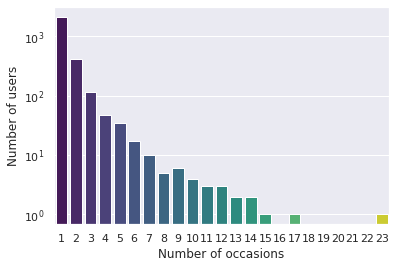

In [ ]:
occasions = np.array(range(1,24))
counts = np.array([(2788-661), (661 -255), (255-138), (138-90), (90-55), (55-38), (38-28), (28-23), (23-17), (17-13), (13-10), (10-7), 2, 2, 1, 0, 1, 0,0,0,0,0,1])
fig = sns.barplot(x = occasions, y = counts, palette = 'viridis')
fig.set_xlabel(xlabel = 'Number of occasions')
fig.set_ylabel(ylabel = 'Number of users')
fig.set(yscale="log")

Text(0, 0.5, 'Mean')

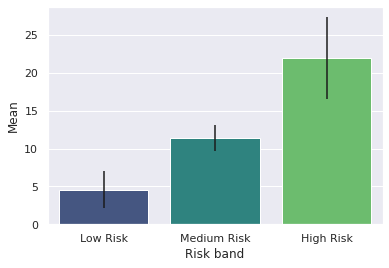

In [ ]:
means = [4.595662,11.423301,21.978453]
stds = [2.496033,1.734417,5.389842]
labels = ['Low Risk', 'Medium Risk', 'High Risk']
fig7 = sns.barplot(x = labels, y = means, yerr = stds, palette='viridis')
fig7.set_xlabel(xlabel = 'Risk band')
fig7.set_ylabel(ylabel = 'Mean')

In [ ]:
#(df_core.loc[df_core['risk_band'] == 'high risk']).mean(axis=0) 
df_core.groupby('risk_band')['CORE_score'].median(), df_core.groupby('risk_band')['CORE_score'].std()

(risk_band
 high risk      21
 low risk        5
 medium risk    11
 Name: CORE_score, dtype: int64, risk_band
 high risk      5.389842
 low risk       2.496033
 medium risk    1.734417
 Name: CORE_score, dtype: float64)

In [ ]:
df_core['ALF'].unique()

array([49295, 50218, 50673, ..., 58262, 58242, 58269])

In [ ]:
trial = (df_itemlevel.loc[df_itemlevel['ALF'] == df_core['ALF'].unique()[171]].groupby('score_update_type')['answer_score'].mean()).apply(np.array)
trial

score_update_type
baseline     4.216418
remeasure    4.103448
Name: answer_score, dtype: float64

In [ ]:
def TypeOfContent(df, ALF_col, content, answer_score):

  ''' This function finds the counts of different type of content that each
  user interacts with. Also has another output that just contains users that only
  have newsletter interactions -- not yet need to put it in.. 
  
  Inputs
  df : dataframe you are working with. eg df_itemlevel
  ALF_col : column within the dataframe that contains the anonymous ALF codes 
  of each individual. eg df_itemlevel['ALF']
  content: column within the dataframe that contains the type of content
  of that interaction. one of 4: article, video, podcast. 
  eg. df_behaviours['content_media_type']
  answer_score: column within the dataframe that contains the answer score
  of that interaction.
  eg. df_itemlevel['answer_score']

  Outputs

  '''

  content_type = np.empty([len(df_core['ALF'].unique()), 10])

  for i in range(len(df_core['ALF'].unique())):
  
    clear_output(wait = True)
  
    content_type[i][0] = answer_score[ALF_col == df_core['ALF'].unique()[i]][content == 'remeasure'].mean()
    content_type[i][1] = answer_score[ALF_col == df_core['ALF'].unique()[i]][content == 'Daily_workout'].mean()
    content_type[i][2] = answer_score[ALF_col == df_core['ALF'].unique()[i]][content == 'keepTrack'].mean()
    content_type[i][3] = answer_score[ALF_col == df_core['ALF'].unique()[i]][content == 'digDeeper'].mean()
    content_type[i][4] = answer_score[ALF_col == df_core['ALF'].unique()[i]][content == 'baseline'].mean()

    print("Current Progress:", np.round(((i) / len(df_core['ALF'].unique())) * 100, 2), "%")
    if np.round(((i) / len(df_core['ALF'].unique())) * 100, 2) == 99.99:
      clear_output(wait = True)
      print("Complete")

  overall = content_type[:,0]
  article = content_type[:,1]
  video = content_type[:,2]
  podcast = content_type[:,3]
  newsletter = content_type[:,4]

  return content_type, overall, article, video, podcast, newsletter

In [ ]:
overall, remeasure, daily, keep, dig, baseline = TypeOfContent(df_itemlevel,df_itemlevel['ALF'],df_itemlevel['score_update_type'], df_itemlevel['answer_score'])

In [ ]:
means = [np.nanmean(remeasure), np.nanmean(daily), np.nanmean(keep), np.nanmean(dig), np.nanmean(baseline)]
labels = ['Remeasure', 'Daily Workout', 'Keep Track', 'Dig Deeper', 'Baseline']
stds = [np.nanstd(remeasure), np.nanstd(daily), np.nanstd(keep), np.nanstd(dig), np.nanstd(baseline)]
fig1 = sns.barplot(x = labels, y = means, yerr = stds, palette='viridis')
fig1.set(xlabel='Update Type', ylabel='Mean')
fig1.set_xticklabels(labels, rotation=15)

In [ ]:
means

### Main DataFrame

just need to think and plan out -- what do we want in the data frame?
only users, no point having the employees who haven't finished baseline - done
if no baseline, take a remeasure score - done \\
gender - done 

is a manager - done \\
age - done \\
sector - done \\
total number of visits - done \\
average gap between visits? and std of visit gaps - done \\
content they interact with - done \\
number of remeasures - done\\
number of daily workouts - done\\
whether they are in CORE or not - done\\



In [ ]:
np.array(df_employees['ALF'][df_employees['appuser'] ==1])#[df_employees[['gender', 'ALF', 'manager', 'company_id']]]

array([ 1658., 57803.,  2844., ..., 58131., 56472., 57089.])

In [ ]:
len(set(df_behaviours['ALF'].unique()).intersection(np.array(df_employees['ALF'][df_employees['appuser'] ==1])))

7879

In [ ]:
df_employees.loc[df_employees['appuser'] == 1]

In [ ]:
ALFs = df_employees.loc[df_employees['appuser'] == 1]['ALF']
Age = df_employees.loc[df_employees['appuser'] == 1]['age']
Gender = df_employees.loc[df_employees['appuser'] == 1]['gender']
Manager = df_employees.loc[df_employees['appuser'] == 1]['manager']
Sector = df_employees.loc[df_employees['appuser'] == 1]['company_id']
data = {'ALF': ALFs,
        'Age' : Age,
        'Gender' : Gender,
        'Manager' : Manager,
        'Sector' : Sector}

In [ ]:
df = pd.DataFrame(data)
df.Gender[df.Gender == 'male'] = 1
df.Gender[df.Gender == 'female'] = 0
df.Sector = df.Sector.str.replace('\d+', '')
df['Sector'] = df['Sector'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data2 = {'ALF' : df_wbw['ALF'].unique(),
         'Baseline' : scores.reshape((len(scores)),)}
df2 = pd.DataFrame(data2) 
df2.head()

In [ ]:
cols = ['ALF']
df = df.join(df2.set_index(cols), on=cols)

In [ ]:
data3 = {'ALF' : df_wbw['ALF'].unique(),
         'Visits' : visits.reshape((len(visits)),)}
df3 = pd.DataFrame(data3) 
df3.head()

In [ ]:
cols = ['ALF']
df = df.join(df3.set_index(cols), on=cols)

In [ ]:
data4 = {'ALF' : df_core['ALF'].unique(),
         'CORE' : np.ones((df_core['ALF'].nunique(),))}
df4 = pd.DataFrame(data4) 
df4.head()

In [ ]:
cols = ['ALF']
df = main_df.join(df4.set_index(cols), on=cols)
df['CORE'] = df['CORE'].fillna(0)

In [ ]:
data5 = {'ALF' : df_wbw['ALF'].unique(),
         'Remeasure' : occasions.reshape((len(occasions)),)}
df5 = pd.DataFrame(data5) 
df5.head()

In [ ]:
cols = ['ALF']
df = df.join(df5.set_index(cols), on=cols)

In [ ]:
data6 = {'ALF' : df_wbw['ALF'].unique(),
         'Daily workouts' : daily_workout}
df6 = pd.DataFrame(data6) 

In [ ]:
cols = ['ALF']
df = df.join(df6.set_index(cols), on=cols)

In [ ]:
data7 = {'ALF' : df_behaviours['ALF'].unique(),
         'Overall Interactions' : overall,
         'Articles accessed': article,
         'Videos watched': video,
         'Podcasts listened': podcast,
         'Newsletter read' : newsletter}
df7 = pd.DataFrame(data7) 
df7.head()

In [ ]:
cols = ['ALF']
df = df.join(df7.set_index(cols), on=cols)

In [ ]:
data8 = {'ALF' : df_behaviours['ALF'].unique(),
         'Total Days' : total_days.reshape((len(total_days)),),
         'Mean between Visits': mean.reshape((len(mean)),),
         'Standard Deviation': std.reshape((len(std)),)}
df8 = pd.DataFrame(data8) 
df8.head()

In [ ]:
cols = ['ALF']
df = df.join(df8.set_index(cols), on=cols)

In [ ]:
data9 = {'ALF' : df_wbw['ALF'].unique(),
         'Total Days wbw' : total_days_wbw.reshape((len(total_days_wbw)),),
         'Mean between Visits wbw': mean_wbw.reshape((len(mean_wbw)),),
         'Standard Deviation wbw': std_wbw.reshape((len(std_wbw)),)}
df9 = pd.DataFrame(data9) 
df9.head()

In [ ]:
remeasure.shape

(13205,)

In [ ]:
cols = ['ALF']
df = df.join(df9.set_index(cols), on=cols)

In [ ]:
data10 = {'ALF' : df_itemlevel['ALF'].unique(),
         'Remeasure clicks' : remeasure,
         'Keep Track clicks': keeptrack,
         'Dig Deeper clicks': digdeeper,
          'Daily workout clicks': dailyworkout,
          'Baseline clicks': baseline}
df10 = pd.DataFrame(data10) 
df10.head()

In [ ]:
cols = ['ALF']
df = df.join(df10.set_index(cols), on=cols)

In [ ]:
data11 = {'ALF' : df_wbw_2['ALF'].unique(),
          'social': septiles[:,0],
          'emotional': septiles[:,1], 
          'physical': septiles[:,2], 
          'global': septiles[:,3], 
          'learning_development': septiles[:,4],
          'psychological': septiles[:,5], 
          'work_related': septiles[:,6]}
df11 = pd.DataFrame(data11) 
df11.head()

In [ ]:
cols = ['ALF']
df = df.join(df11.set_index(cols), on=cols)

In [ ]:
df.head()

,ALF,Age,Gender,Manager,Sector,Baseline,Qus Answered,CORE,Remeasure,Daily workouts,Content accessed,Articles read,Videos watched,Podcasts listened,Newsletter read,Total Days,Mean between Visits,Standard Deviation,Total Days wbw,Mean between Visits wbw,Standard Deviation wbw,Remeasure clicks,Keep Track clicks,Dig Deeper clicks,Daily workout clicks,Baseline clicks,social,emotional,physical,global,learning_development,psychological,work_related
0,1658.0,NaN,NaN,0.0,Consumer Services,49.626667,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,57803.0,NaN,NaN,0.0,Emergency Services,66.200000,37.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,4.0,130.0,4.0,4.0,3.0,1.0,6.0,3.0,0.0
2,2844.0,NaN,0.0,0.0,"Marketing, PR & Advertising",80.958824,40.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,3.0,3.5,1.5,0.0,0.0,0.0,10.0,173.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0
3,26096.0,NaN,0.0,0.0,Professional Services,70.767742,31.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,115.0,4.0,5.0,3.0,3.0,NaN,6.0,4.0
4,2996.0,30.0,1.0,0.0,Financial Services,76.973333,6.0,0.0,0.0,0.0,36.0,4.0,0.0,0.0,10.0,23.0,18.5,22.86,1.0,NaN,NaN,0.0,0.0,0.0,0.0,29.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [ ]:
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [ ]:
main_df = pd.read_csv('/content/drive/MyDrive/thesis/data.csv')

In [ ]:
main_df.head()

,Unnamed: 0,ALF,Age,Gender,Manager,Sector,Baseline,Qus Answered,CORE,Remeasure,Daily workouts,Content accessed,Articles read,Videos watched,Podcasts listened,Newsletter read,Total Days,Mean between Visits,Standard Deviation,Total Days wbw,Mean between Visits wbw,Standard Deviation wbw,Remeasure clicks,Keep Track clicks,Dig Deeper clicks,Daily workout clicks,Baseline clicks,social,emotional,physical,global,learning_development,psychological,work_related
0,0,1658.0,NaN,NaN,0.0,Consumer Services,49.626667,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,1,57803.0,NaN,NaN,0.0,Emergency Services,66.200000,37.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,4.0,130.0,4.0,4.0,3.0,1.0,6.0,3.0,0.0
2,2,2844.0,NaN,0.0,0.0,"Marketing, PR & Advertising",80.958824,40.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,3.0,3.5,1.5,0.0,0.0,0.0,10.0,173.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0
3,3,26096.0,NaN,0.0,0.0,Professional Services,70.767742,31.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,115.0,4.0,5.0,3.0,3.0,NaN,6.0,4.0
4,4,2996.0,30.0,1.0,0.0,Financial Services,76.973333,6.0,0.0,0.0,0.0,36.0,4.0,0.0,0.0,10.0,23.0,18.5,22.86,1.0,NaN,NaN,0.0,0.0,0.0,0.0,29.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [ ]:
del main_df['Unnamed: 0']

###Misc Cells

In [ ]:
(df_wbw.loc[df_wbw['ALF'] == 49295]['end_time'] - df_wbw.loc[df_wbw['ALF'] == 49295]['start_time']).sum()

In [ ]:
'''elapsed_time = np.empty([len(df_wbw['ALF'].unique()), 1])
for i in range(len(df_wbw['ALF'].unique())):
  clear_output(wait = True)
  elapsed_time[i] = ((df_wbw.loc[df_wbw['ALF'] == df_wbw['ALF'].unique()[i]]['end_time'] - df_wbw.loc[df_wbw['ALF'] == df_wbw['ALF'].unique()[i]]['start_time']).sum()).total_seconds()
  print("Current Progress:", np.round(((i) / len(df_wbw['ALF'].unique())) * 100, 2), "%")'''

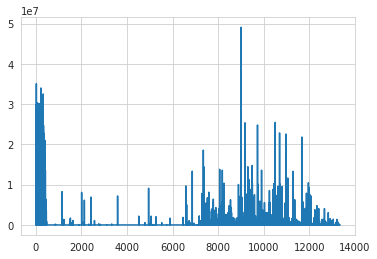

In [ ]:
plt.plot(tottime_wbw)
plt.show()

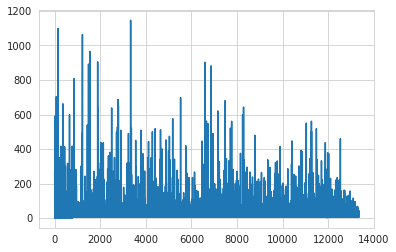

Average time per visit in hours:  1.34


In [ ]:
plt.plot(visits)
plt.show()
print("Average time per visit in hours: ", np.round((tottime_wbw.mean() /visits.mean())/(60*60),2))
#but the issue with the average comes from the massive outliers

In [ ]:
print("Median Visits: ", np.median(visits))
print("Mean Visits: ", np.mean(visits))
print("Mode Visits: ", stats.mode(visits))

#this looks more useful, but doesn't look like it equates to the plot???
#it actually does, each line is just for each ALF's individual's visits
#change it to count the number of each amount of visits and plot them????

Median Visits:  35.0
Mean Visits:  39.46562312762133
Mode Visits:  ModeResult(mode=array([[35.]]), count=array([[2553]]))


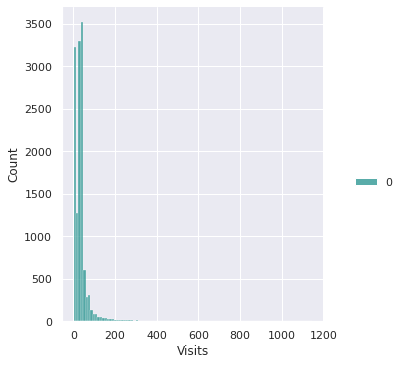

In [ ]:
fig = sns.displot(data = ((np.sort(visits.T)).T), bins = 100, kde = False, palette = 'viridis')
fig.set_axis_labels('Visits', 'Count')

In [ ]:
print("Number of users with 0 visits: ", np.count_nonzero(visits==0))
print("Number of users with fewer than 35 visits (but more than 0): " ,np.count_nonzero((0 < visits) & (visits <= 35)))
print("Number of users with more than 35, fewer than 100 visits: " ,np.count_nonzero((35 < visits) & (visits <= 100)))
print("Number of users with more than 100, fewer than 200 visits: " ,np.count_nonzero((100 < visits) & (visits <= 200)))
print("Number of users with more than 200 visits: " ,np.count_nonzero((200 < visits)))

Number of users with 0 visits:  0
Number of users with fewer than 35 visits (but more than 0):  7796
Number of users with more than 35, fewer than 100 visits:  4917
Number of users with more than 100, fewer than 200 visits:  383
Number of users with more than 200 visits:  256


In [ ]:
print("Mean visits: ", np.round(np.mean(visit_type[:,0]),2))
print("Mean baseline interactions: ", np.round(np.mean(visit_type[:,1]),2))
print("Mean Daily workout interactions: ", np.round(np.mean(visit_type[:,2]),2))
print("Mean activities interactions: ", np.round(np.mean(visit_type[:,3]),2))
print("Mean remeasure interactions: ", np.round(np.mean(visit_type[:,4]),2))


Mean visits:  39.47
Mean baseline interactions:  25.66
Mean Daily workout interactions:  3.89
Mean activities interactions:  4.14
Mean remeasure interactions:  3.54


In [ ]:
def MeanModeMedian(visits):

  mean = np.mean(visits)
  median = np.median(visits)
  mode = stats.mode(visits)

  print("Mean ", visits, " visits: ", mean)
  print("Median ", visits, " visits: ", median)
  print("Mode ", visits, " visits: ", mode)


In [ ]:
#df = df.dropna(subset=['Baseline'])
df['Overall Interactions'].isnull().sum()

5086

In [ ]:
#df['Gender']({'other': None})
#df['Gender'][2185:2195]
#help = pd.to_numeric(df['Gender'], errors='coerce')
#help[2185:2195]
#np.nanmean(help)
#an_array[1] = np. nan
#df['Gender'][2189]
#X[:,1][2189] = np.nan
X[:,1][2189]

nan

In [ ]:
df['Gender'] = df['Gender'].replace('other', np.nan)
df['Gender'] = df['Gender'].astype(float)

In [ ]:
#np.nanmean(X[:,1])
#whe = np.where(X[:,1] == 'other')

#print(whe)
for w in whe:
  X[:,1][w] = np.nan

In [ ]:
'''x_bar = np.zeros(data_dim)
stds = np.zeros(data_dim)
X = np.empty((N, data_dim))

for i in range(data_dim):
    x_bar[i] = np.mean(Xa[:,i])
    stds[i] = np.std(Xa[:,i])
    X[:,i] = (Xa[:,i] - x_bar[i])/stds[i]'''

In [ ]:
#-----------------------------------------------------------------------------------------------#
#Using the baseline scores to split into k number of categories to superimpose onto the clusters

'''Ya = np.empty((len(Y),))
byfive = int(np.round(len(Y)/5))
Y.sort()
Y1 = Y[byfive]
Y2 = Y[byfive*2]
Y3 = Y[byfive*3]
Y4 = Y[byfive*4]

for i in range(len(Y)):
  if Y[i] <= np.max(Y1):
    Ya[i] = 1
  elif Y[i] <= np.max(Y2):
    Ya[i] = 2
  elif Y[i] <= np.max(Y3):
    Ya[i] = 3
  elif Y[i] <= np.max(Y4):
    Ya[i] = 4
  else: 
    Ya[i] = 5'''

In [ ]:
plt.figure(figsize=(10,8))
for k in range(5):
    plt.plot(Z[Ya==int(k),pc_i], Z[Ya==int(k),pc_ii], '+', color='C%d'%k, markersize=8)
plt.legend(['Septile 1', 'Septile 2', 'Septile 3', 'Septile 4', 'Septile 5'])
plt.xlabel("PC %d"%pc_i);
plt.ylabel("PC %d"%pc_ii);

In [ ]:
df_septiles.plot(x="Cluster", y=["social - R", "social - W", "social - T"], kind="bar",figsize=(9,8))
plt.show()

In [ ]:
data_septiles = {'Cluster' : range(K),
         'social - R' : risk[:,0],
         'social - W': well[:,0],
         'social - T': thriving[:,0],
         'emotional - R' : risk[:,1],
         'emotional - W': well[:,1],
         'emotional - T': thriving[:,1],
         'physical - R' : risk[:,2],
         'physical - W': well[:,2],
         'physical - T': thriving[:,2],
         'global - R' : risk[:,3],
         'global - W': well[:,3],
         'global - T': thriving[:,3],
         'learning_development - R' : risk[:,4],
         'learning_development - W': well[:,4],
         'learning_development - T': thriving[:,4],
         'psychological - R' : risk[:,5],
         'psychological - W': well[:,5],
         'psychological - T': thriving[:,5],
         'work_related - R' : risk[:,6],
         'work_related - W': well[:,6],
         'work_related - T': thriving[:,6]}
df_septiles = pd.DataFrame(data_septiles) 
df_septiles.head()

In [ ]:
fig1 = sns.barplot(x = ['At risk', 'Doing Well', 'Thriving'], y = [risk[0,0], well[0,0], thriving[0,0]], palette='viridis')
fig1.set(xlabel='Cluster 1', ylabel='Septile Count')

### PCA and CLUSTERING

In [ ]:
main_df = pd.read_csv('/content/drive/MyDrive/thesis/data.csv')

In [ ]:
main_df.head()

,Unnamed: 0,ALF,Age,Gender,Manager,Sector,Baseline,Qus Answered,CORE,Remeasure,Daily workouts,Content accessed,Articles read,Videos watched,Podcasts listened,Newsletter read,Total Days,Mean between Visits,Standard Deviation,Total Days wbw,Mean between Visits wbw,Standard Deviation wbw,Remeasure clicks,Keep Track clicks,Dig Deeper clicks,Daily workout clicks,Baseline clicks,social,emotional,physical,global,learning_development,psychological,work_related
0,0,1658.0,NaN,NaN,0.0,Consumer Services,49.626667,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,1,57803.0,NaN,NaN,0.0,Emergency Services,66.200000,37.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,4.0,130.0,4.0,4.0,3.0,1.0,6.0,3.0,0.0
2,2,2844.0,NaN,0.0,0.0,"Marketing, PR & Advertising",80.958824,40.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,3.0,3.5,1.5,0.0,0.0,0.0,10.0,173.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0
3,3,26096.0,NaN,0.0,0.0,Professional Services,70.767742,31.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,115.0,4.0,5.0,3.0,3.0,NaN,6.0,4.0
4,4,2996.0,30.0,1.0,0.0,Financial Services,76.973333,6.0,0.0,0.0,0.0,36.0,4.0,0.0,0.0,10.0,23.0,18.5,22.86,1.0,NaN,NaN,0.0,0.0,0.0,0.0,29.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [ ]:
del main_df['Unnamed: 0']

In [ ]:
df = main_df

In [ ]:
#df = df.rename({'Visits': 'Qus Answered', 'Articles accessed': 'Articles read', 'Overall Interactions': 'Content accessed'}, axis=1)

After building the data frame by hand picking the variables we felt gave a good overview how individuals made use of the app, we studied it. There are a lot of missing values, owing to the fact that some users do not have data recorded in all of the data set, so our next task was to go about filling or changing these to the best of our ability, to give us a more filled data set, without compromising the data we have. Demographic variables such as age, gender etc are not as much of a worry, since they will be used to analyse the results more than create them, and we can get around that issue once we arrive there. \\
If we have an data set with lots of gaps, PCA and clustering will not perform as well, so we need to reduce the number of empty spaces as much as possible, using different methods. \\
Firstly, 1465 entries from an original data set with 13662 entries did not have a baseline score or any visits recorded, which suggests that even though they did sign up to the app, they did not complete the baseline assessment or any remeasures, and thus are not useful in our experiment. \\
Thus, firstly we omitted these from the data set, especially owing to the fact that for many of them, their rows were empty, as they had not interacted with the app past signing up. \\
As we want to keep our data set with as many inputs as possible, for other variables, we will use other methods to fill any gaps. Simply deleting rows that contained a null value would not have been pragmatic, since this would result in too small a data set to draw meaningful conclusions from. 

baseline: collected from their scores of baseline measurements questionnaire in Wellbeing Wheel data set. Average score of each sub section, and if they wasnt once recorded, but they did have a remeasure score, we would use their first remeasure score in place of a baseline.\\
Visits: (Poorly named) visits are the number of times they answered questions posed by the app, whether that be baseline, digdeeper, keep track etc. So the higher the visits, the happier the user is to answer those qus that are asked. also from wellbeing wheel\\
Remeasure: from wellbeing wheel, indicates the number of times they have remeasured. as mentioned previously the uptake is low, making it difficult to perform experiments over peoples updated scores through time. \\
Daily Workouts: also wellbeing wheel, just the number of daily workouts someone has done, helps to paint a picture of how they use the app.\\



Overall Interactions: From behaviours data set. Record of how many times a user has gone on to the app for one reason or another, but doesn't always seem to sync up with the wbw data set, which is why both are included to give a better sense overall. \\
Articles, Videos, Podcasts, Newsletter: all behaviours. all self explanatory, how many of each of these a user has consumed. \\
Total Days: behaviours. takes the number of unique days a person has been on the app/read the newsletter. \\
Mean, std: behaviours. mean number of days and std of those visits. gives a sense of the frequency and regularity the app is accessed by an individual. \\
Total days, mean, std wbw: wellbeing wheel. same as above, but on the wellbeing wheel, so things arent missed. 

Nothing really from itemlevel in here, since its mainly detailing more about the questions asked about in the baseline and the responses given

For overall interactions (and articles vids podcasts), there were 5086 data points with empty values. We have replaced them with 0, since even if that may not be true, this variable gives us a sense of content interacted with, and thus 0 is an appropriate number if there is no record of them. 
Gone with kNN method, so it takes into account similarities off all columns, not just column in question. So imported with sklearn, using 4 nearest neighbours to fill nan values. 

In [ ]:
for i in range(df.shape[1]):
	# count number of rows with missing values
	n_miss = df.iloc[:, [i]].isnull().sum()[0]
	perc = n_miss / df.shape[0] * 100
	print('> ', df.columns[i],' Missing: %d (%.1f%%)' % ( n_miss, perc))

>  ALF  Missing: 0 (0.0%)
>  Age  Missing: 7072 (58.0%)
>  Gender  Missing: 6945 (56.9%)
>  Manager  Missing: 0 (0.0%)
>  Sector  Missing: 0 (0.0%)
>  Baseline  Missing: 0 (0.0%)
>  Qus Answered  Missing: 0 (0.0%)
>  CORE  Missing: 0 (0.0%)
>  Remeasure  Missing: 0 (0.0%)
>  Daily workouts  Missing: 0 (0.0%)
>  Content accessed  Missing: 5086 (41.7%)
>  Articles read  Missing: 5086 (41.7%)
>  Videos watched  Missing: 5086 (41.7%)
>  Podcasts listened  Missing: 5086 (41.7%)
>  Newsletter read  Missing: 5086 (41.7%)
>  Total Days  Missing: 5086 (41.7%)
>  Mean between Visits  Missing: 6488 (53.2%)
>  Standard Deviation  Missing: 6488 (53.2%)
>  Total Days wbw  Missing: 0 (0.0%)
>  Mean between Visits wbw  Missing: 5956 (48.8%)
>  Standard Deviation wbw  Missing: 5956 (48.8%)
>  Remeasure clicks  Missing: 0 (0.0%)
>  Keep Track clicks  Missing: 0 (0.0%)
>  Dig Deeper clicks  Missing: 0 (0.0%)
>  Daily workout clicks  Missing: 0 (0.0%)
>  Baseline clicks  Missing: 0 (0.0%)
>  social  Missi

In [ ]:
df

,ALF,Age,Gender,Manager,Sector,Baseline,Qus Answered,CORE,Remeasure,Daily workouts,Content accessed,Articles read,Videos watched,Podcasts listened,Newsletter read,Total Days,Mean between Visits,Standard Deviation,Total Days wbw,Mean between Visits wbw,Standard Deviation wbw,Remeasure clicks,Keep Track clicks,Dig Deeper clicks,Daily workout clicks,Baseline clicks,social,emotional,physical,global,learning_development,psychological,work_related
0,1658.0,NaN,NaN,0.0,Consumer Services,49.626667,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,57803.0,NaN,NaN,0.0,Emergency Services,66.200000,37.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,4.0,130.0,4.0,4.0,3.0,1.0,6.0,3.0,0.0
2,2844.0,NaN,0.0,0.0,"Marketing, PR & Advertising",80.958824,40.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,3.0,3.5,1.5,0.0,0.0,0.0,10.0,173.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0
3,26096.0,NaN,0.0,0.0,Professional Services,70.767742,31.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,115.0,4.0,5.0,3.0,3.0,NaN,6.0,4.0
4,2996.0,30.0,1.0,0.0,Financial Services,76.973333,6.0,0.0,0.0,0.0,36.0,4.0,0.0,0.0,10.0,23.0,18.50,22.86,1.0,NaN,NaN,0.0,0.0,0.0,0.0,29.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12192,15238.0,19.0,0.0,0.0,Recruitment,50.093429,56.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,5.0,3.00,1.58,3.0,9.5,8.5,0.0,62.0,2.0,4.0,182.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0
12193,57122.0,NaN,NaN,0.0,Partner,78.960000,37.0,0.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,6.0,2.40,1.36,2.0,1.0,0.0,0.0,0.0,0.0,3.0,130.0,4.0,6.0,4.0,6.0,6.0,6.0,5.0
12194,58131.0,NaN,NaN,0.0,Partner,68.775000,16.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,59.0,NaN,3.0,4.0,3.0,NaN,NaN,NaN
12195,56472.0,NaN,NaN,0.0,Partner,61.440000,35.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,8.0,3.71,2.49,1.0,NaN,NaN,0.0,0.0,0.0,0.0,130.0,5.0,2.0,3.0,1.0,0.0,2.0,3.0


In [ ]:
df_men = df.loc[df['Gender']==0]
df_women = df.loc[df['Gender']==1]
df_c = df.loc[df['CORE']==1]
df_health = df.loc[df['Sector']=='Healthcare']

In [ ]:
#-----------------------------------------------------------------------------------------------#
#Building the matrix from the variables in the df that we want to include in PCA and clustering
#separate for men and women, in order to analyse

Xo = df[['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks']].to_numpy()
Xm = df_men[['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks']].to_numpy()
Xw = df_women[['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks']].to_numpy()
Xc = df_c[['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks']].to_numpy()
Xh = df_health[['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks']].to_numpy()

#-----------------------------------------------------------------------------------------------#
# Choosing which data set to use before continuing

Xa = Xo


In [ ]:
#-----------------------------------------------------------------------------------------------#
#Getting the y labels i.e. the baseline scores

Yo = df['Baseline'].to_numpy()
Ym = df_men['Baseline'].to_numpy()
Yw = df_women['Baseline'].to_numpy()
Yc = df_c['Baseline'].to_numpy()
Yh = df_health['Baseline'].to_numpy()

#-----------------------------------------------------------------------------------------------#
#Choosing the Y (MUST BE SAME AS X!!!)

Y = Yo


In [ ]:
#-----------------------------------------------------------------------------------------------#
#Getting the S labels i.e. the septile scores
dim_names = ['social', 'emotional',	'physical', 'global',	'learning_development',	'psychological',	'work_related']

So = df[['social', 'emotional',	'physical', 'global',	'learning_development',	'psychological',	'work_related']].to_numpy()
Sm = df_men[['social', 'emotional',	'physical', 'global',	'learning_development',	'psychological',	'work_related']].to_numpy()
Sw = df_women[['social', 'emotional',	'physical', 'global',	'learning_development',	'psychological',	'work_related']].to_numpy()
Sc = df_c[['social', 'emotional',	'physical', 'global',	'learning_development',	'psychological',	'work_related']].to_numpy()
Sh = df_health[['social', 'emotional',	'physical', 'global',	'learning_development',	'psychological',	'work_related']].to_numpy()

#-----------------------------------------------------------------------------------------------#
#Choosing the S (MUST BE SAME AS X!!!)

S = So

In [ ]:
#-----------------------------------------------------------------------------------------------#
# Using a kNN imputer to fill the NaN values in the matrix

imputer = KNNImputer(n_neighbors=4, weights="uniform")
Xb = imputer.fit_transform(Xa)

In [ ]:
#-----------------------------------------------------------------------------------------------#
# Getting dimensions of the matrix X, and choosing how many principal components to choose

N, data_dim = Xb.shape
N_components = 8

In [ ]:
x_bar = np.zeros(data_dim)
stds = np.zeros(data_dim)
X = np.empty((N, data_dim))

for i in range(data_dim):
    x_bar[i] = np.mean(Xb[:,i])
    stds[i] = np.std(Xb[:,i])
    X[:,i] = (Xb[:,i] - x_bar[i])/stds[i]

In [ ]:
def compute_PCA_parameters(X, M):
    """
    This function computes the first M prinicpal components of a
    dataset X. It returns the mean of the data, the projection matrix,
    and the associated singular values.
    
    inputs
    X    : (N, D) matrix; each row is a D-dimensional data point
    M    : integer, <= D (number of principal components to return)
    
    outputs
    x_bar  : (D,) vector, with the mean of the data
    W      : (D, M) semi-orthogonal matrix of projections
    s      : (D,) vector of singular values
    """

    # ... return x_bar, W, s
    
    #-----------------------------------------------------------------------------#
    #get shapes of inputs, initialise matrix/vector sizes
    N,D = X.shape
    
    x_bar = np.zeros(D)
    S = np.zeros((D,D))
    W = np.zeros((D,M))
    maxim = np.zeros(M)
    
    #-----------------------------------------------------------------------------#
    
    #finding the mean of each dimension over all inputs
    #ie if they were 3 inputs, 5 dims, take the mean of the first column of 3 numbers, etc 5 times
    
    #for i in range(D):
    #  x_bar[i] = np.mean(X[:,i], dtype='float32')

    for i in range(D):
        x_bar[i] = np.sum(X[:,i])
    x_bar = (1/N) * x_bar
    
    #-----------------------------------------------------------------------------#
    
    #finding the covariance of the data
    #so find the difference between each row (input) and the mean, multiply by transpose to get
    #DxD matrix, then sum all of the differences together (so number of inputs) and divide by N 
    #to get covariance
    
    for i in range(N):
        S += (X[i] - x_bar).reshape((D,1)) * (X[i] - x_bar).reshape((D,1)).T
    S = (1/N) * S
    
    #-----------------------------------------------------------------------------#
    
    #calculating the eigenvalues and their corresponding eigenvectors
    values = np.linalg.eig(S)
    eigvals = values[0]
    eigvecs = values[1]
    
    #-----------------------------------------------------------------------------#
    
    #calculating the matrix of projections
    
    vals = np.copy(eigvals)
    
    #-----------------------------------------------------------------------------#
    
    #finding the index of the ith largest eigval, get its corresponding eigvec and have that as 
    #ith row in W... then change that eigval to 0 in the copy, so next loop can find the second largest etc
    
    for j in range(M):
        maxim[j] = np.argmax(vals)
        index = int(maxim[j])
        W[:,j] = eigvecs[:,index]
        vals[index] = 0
    #-----------------------------------------------------------------------------#
    
    #singular value decomposition of X to find s, the vector of singular values
    X_Bar = X - x_bar
    u, s, vh = np.linalg.svd(X_Bar, full_matrices= False, compute_uv = True ,hermitian = False)
    
    #-----------------------------------------------------------------------------#
    
    return x_bar, W, s, eigvals


In [ ]:
x_bar, W, s, values = compute_PCA_parameters(X, N_components)

In [ ]:
#-----------------------------------------------------------------------------#
#Find the components with the most variance
vars = ['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks']
vals = np.copy(values)
maxim = np.zeros(len(vals))
for j in range(len(vals)):
    maxim[j] = np.argmax(vals)
    index = int(maxim[j])
    print('Rank', j+1, 'variance with', np.round(values[j]/np.sum(values)*100, 2), '% total variance:' , vars[index] )
    vals[index] = 0

Rank 1 variance with 33.17 % total variance: Qus Answered
Rank 2 variance with 21.44 % total variance: Remeasure
Rank 3 variance with 8.24 % total variance: Daily workouts
Rank 4 variance with 6.89 % total variance: Content accessed
Rank 5 variance with 6.54 % total variance: Articles read
Rank 6 variance with 5.53 % total variance: Videos watched
Rank 7 variance with 4.09 % total variance: Podcasts listened
Rank 8 variance with 3.8 % total variance: Newsletter read
Rank 9 variance with 3.3 % total variance: Total Days
Rank 10 variance with 2.54 % total variance: Mean between Visits
Rank 11 variance with 1.84 % total variance: Standard Deviation
Rank 12 variance with 1.26 % total variance: Total Days wbw
Rank 13 variance with 0.51 % total variance: Mean between Visits wbw
Rank 14 variance with 0.37 % total variance: Standard Deviation wbw
Rank 15 variance with 0.37 % total variance: Remeasure clicks
Rank 16 variance with 0.09 % total variance: Keep Track clicks
Rank 17 variance with 0.

In [ ]:
#-------------------------------------------------------#
#just asserts that all the dimensions of the outputs are as they should be 
assert x_bar.shape == (data_dim,)
assert W.shape == (data_dim, N_components)
assert s.shape == (data_dim,)

In [ ]:
# double-check that the matrix W is actually orthogonal, i.e. with W^T W = I.
assert np.allclose(W.T @ W, np.eye(N_components))

In [ ]:
def PCA_transform(X, W, x_bar):
    """ 
    Apply PCA transformation to data to reduce dimensionality.
    
    inputs
    X     : (N, D) matrix; each row is a D-dimensional data point
    W     : (D, M) semi-orthogonal matrix of projections
    x_bar : (D,) vector, with the mean of the data

    outputs
    Z     : (N, M) matrix of transformed data
    """

    #dimensions of inputs/outputs
    N,D = X.shape
    D,M = W.shape
    Z = np.zeros((N,M))

    for i in range(N):
        Z[i] = W.T @(X[i] - x_bar)
    
    return Z

def PCA_inverse_transform(Z, W, X_bar):
    """
    Apply the PCA inverse transformation, to reconstruct the data
    from the low-dimensional projection.
    
    input
    Z     : (N, M) matrix of transformed data
    W     : (D, M) semi-orthogonal matrix of projections
    x_bar : (D,) vector, with the mean of the data

    output
    X     : (N, D) matrix; each row is a D-dimensional data point
    """
    
    #dimensions of inputs/outputs
    N,M = Z.shape
    D,M = W.shape
    X = np.zeros((N,D))
    
    for i in range(N):
        X[i] =(W @ Z[i]) + x_bar
    
    return X


The singular values that you computed while finding the projection matrix correspond exactly to the explained and unexplained variance.

In the following plot, we show the singular values divided by the number of data points, to show the amount of variance captured in each dimension on a per-datapoint scale.

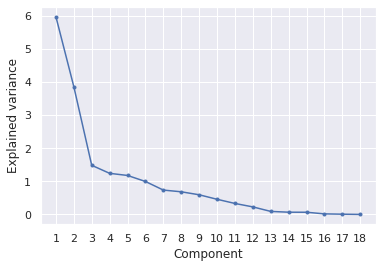

In [ ]:
plt.plot(np.arange(data_dim)+1, s**2 / N, '.-')
plt.xticks(np.arange(data_dim)+1)
plt.xlabel('Component');
plt.ylabel('Explained variance');

In [ ]:
Z = PCA_transform(X, W, x_bar)
X_hat = PCA_inverse_transform(Z, W, x_bar)

squared_error_tr = ((X - X_hat)**2).sum(-1).mean()
unexplained_variance = (s[N_components:]**2).sum() / N
explained_var_percentage = (1-((s[N_components:]**2).sum() / N)/data_dim)*100

print("Average squared reconstruction error: %0.5f" % squared_error_tr)
print("Sum of remaining singular values: %0.5f" % unexplained_variance)
print("Total Variance percentage explained by first %s principal components: %0.2f" % (N_components, (1-((s[N_components:]**2).sum() / N)/18)*100))

Average squared reconstruction error: 1.85698
Sum of remaining singular values: 1.85698
Total Variance percentage explained by first 8 principal components: 89.68


In [ ]:
#just checking they're close as they should be
assert np.isclose(squared_error_tr, unexplained_variance)

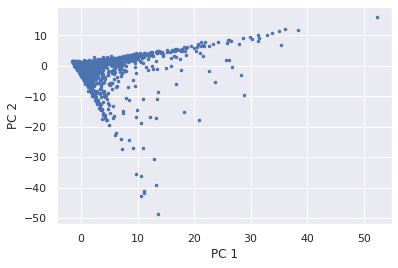

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(Z[:,0], Z[:,1], '.', markersize=5)
plt.xlabel("PC 1");
plt.ylabel("PC 2");

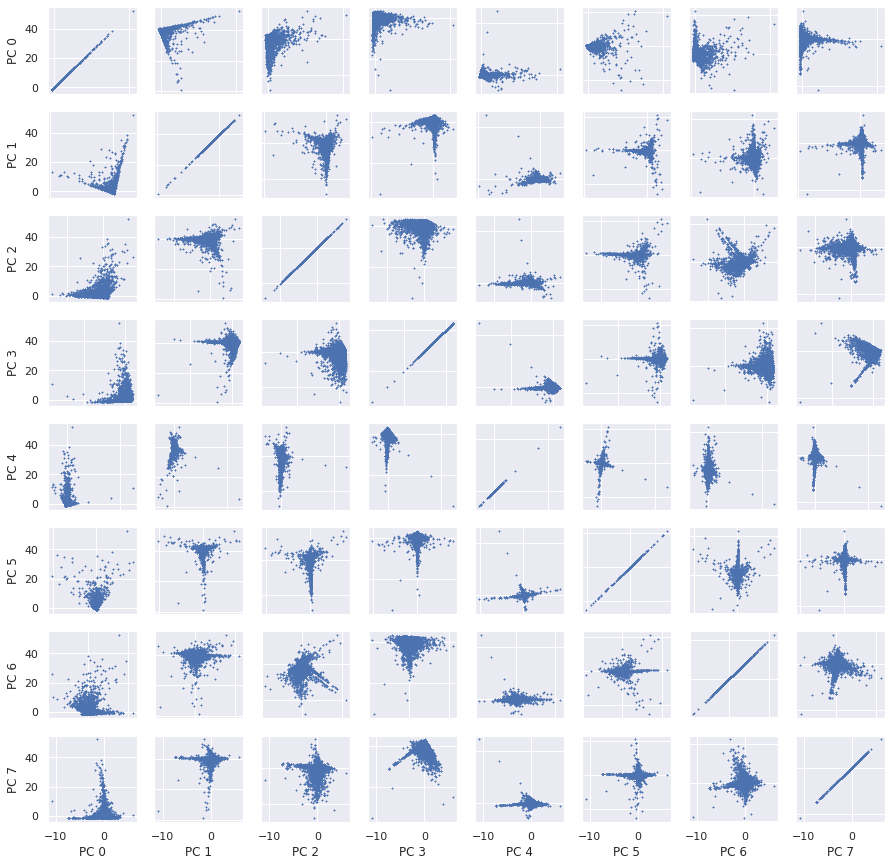

In [ ]:
fig, axs = plt.subplots(N_components, N_components, figsize=(15,15))

for i in range(N_components):
  for j in range(N_components):
    axs[i,j].plot(Z[:,i], Z[:,j], '+', markersize = 2)
    plt.setp(axs[-1, i], xlabel='PC %d'%i)
    plt.setp(axs[i, 0], ylabel='PC %d'%i)

 #Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
def within_cluster_ss(X, z, mu, K):
    """ Returns the total within-cluster sum of squared distances from centers """
    ss = 0
    for k in range(K):
        ss += ((X[z==k] - mu[k])**2).sum()
    return ss

In [ ]:
def update_cluster_means(X, z, K):
    """ 
    Update the cluster means, given the data and a current cluster assignment
    
    input
    X     : (N, D) data matrix; each row is a D-dimensional data point
    z     : (N,) vector of integers indicating current cluster assignment
    K     : integer; target number of clusters

    output
    mu    : (K, D) matrix of cluster centers (means)
    """
    N, D = X.shape
    
    #-----------------------------------------------------------------------------#
    
    #initialise matrix/vector sizes
    mu = np.zeros((K,D))
    Nk = np.zeros(K)
    
    #-----------------------------------------------------------------------------#
    
    #find min and max values for each dimension across the data points, used later
    minvals = np.zeros((1,D))
    maxvals = np.zeros((1,D))

    for d in range(D):
        minvals[:,d] = min(X[:,d])
        maxvals[:,d] = max(X[:,d])

    #-----------------------------------------------------------------------------#
    
    #loop through each cluster value, k, and if the ith data point is in that cluster,
    #add one to the number in that cluster, Nk, and add that D-dim data point to mu[k]
    for i in range(N):
        for k in range(K):
            if z[i] == k:
                Nk[k] += 1
                mu[k] += X[i]
    
    #-----------------------------------------------------------------------------#
    
    #once each is looped through, if there is entries in a given cluster, divide the sum of those points 
    #by the number of the points in that cluster
    #if there are no points in that cluster, assign a random number of D-dim in range of input values
    for k in range(K):
        if Nk[k] > 0:
            mu[k] = mu[k]/Nk[k]
        else: 
            mu[k] = np.random.uniform(low=minvals, high=maxvals, size=(1,D))
            
    return mu

In [ ]:
def update_cluster_assignments(X, mu):
    """ 
    Update cluster assignments, given the data and current cluster means

    input
    X     : (N, D) data matrix; each row is a D-dimensional data point
    mu    : (K, D) matrix of cluster centers (means)

    output
    z     : (N,) vector of integers indicating current cluster assignment
    """
  
    #-----------------------------------------------------------------------------#
    
    #get matrix sizes and initialise sizes of z and distances matrix
    N, D = X.shape
    K, D = mu.shape
    
    z = np.zeros(N)
    distance = np.zeros((N,K))
    
    #-----------------------------------------------------------------------------#
    
    #loop through each data point and calculate squared euclidean distance between it and each cluster mean
    for i in range(N):
        for k in range(K):
            distance[i][k] = np.sum((X[i] - mu[k])**2)
            
    #-----------------------------------------------------------------------------#
    
    #for each data point, find the index of the minimum distance and set that to z[i]
    for i in range(N):
        z[i] = np.argmin(distance[i])

    return z

In [ ]:
#just checking it works as it should do for dummy set
assert np.allclose(update_cluster_means(np.array([[1.0], [2.0], [3.0]]), 
                                        np.array([0, 0, 1]), 2),
                   np.array([[1.5], [3.0]]))


In [ ]:
assert np.allclose(update_cluster_assignments(np.array([[1.0, 1.0], 
                                                        [0.0, 2.0],
                                                        [3.0, 0.0]]), 
                                              np.array([[0.5, 0.5],
                                                        [4.0, -1.0]])),
                                              np.array([0,0,1]))

In [ ]:
def fit_k_means(X, K):
    """
    Using both `update_cluster_means` and `update_cluster_assignments` to
    implement the K-means algorithm.
    
    input
    X    : (N, D) data matrix; each row is a D-dimensional data point
    K    : integer, target (maximum) number of clusters

    output
    z     : (N,) vector of integers indicating final cluster assignment
    mu    : (K, D) matrix of final computed cluster centers (means)
    iters : integer, number of iterations required (measured in terms of
            calls to `update_cluster_assignments`). This is just for 
            diagnosis --- you will not be graded on the value of this
            number being "correct".
    """
    
    # ... return z, mu, iters
    
    #-----------------------------------------------------------------------------#
    
    #get matrix sizes and initialise sizes of outputs
    N, D = X.shape    
    
    z = np.zeros(N)
    mu = np.zeros((K,D))
    count = 0
    
    z_t = np.zeros(N)
    mu_t = np.zeros((K,D))
    mu_t_1 = np.zeros((K,D))
    
    
    #-----------------------------------------------------------------------------#
    
    #find min and max values for each dimension across the data points, used later
    minvals = np.zeros((1,D))
    maxvals = np.zeros((1,D))

    for d in range(D):
        minvals[:,d] = min(X[:,d])
        maxvals[:,d] = max(X[:,d])
    
    for k in range(K):
        mu_t[k] = np.random.uniform(low=minvals/10, high=maxvals/20, size=(1,D))
                                    
    #-----------------------------------------------------------------------------#  
    
    #iterate 1000 times updating cluster assignments and means  
    #stopping conditions
    #once there is no changes in z between iterations -- ie the z_t_1 == z_t, stop

                                    
    while count < 1000:
        z_t = update_cluster_assignments(X, mu_t)
        z_t_1 = z_t
        mu_t_1 = update_cluster_means(X, z_t_1, K)
        count += 1
        mu_t = mu_t_1  
        if count > 1:
            for i in range(N):
                if z_t[i] != z_t_1[i]:
                    z_t = update_cluster_assignments(X, mu_t)
                    z_t_1 = z_t
                    mu_t_1 = update_cluster_means(X, z_t_1, K)
                    count += 1
                    mu_t = mu_t_1
                else:
                    break

                                  
    #-----------------------------------------------------------------------------#
    #outputs
    
    z = z_t
    mu = mu_t_1
    iters = count
    return z, mu, iters

K = 1: 1000 iterations
K = 2: 1000 iterations
K = 3: 1000 iterations
K = 4: 1000 iterations
K = 5: 1000 iterations
K = 6: 1000 iterations
K = 7: 1000 iterations
K = 8: 1000 iterations
K = 9: 1000 iterations


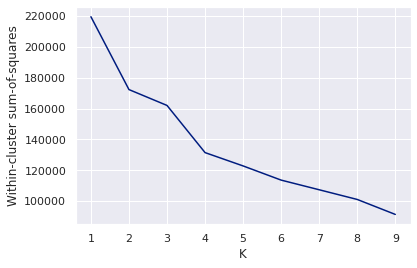

In [ ]:
WSS = []
res = []
Ks = range(1, 10)
for K in Ks:
    z, mu, iters = fit_k_means(X, K)
    print("K = %d: %d iterations" % (K, iters))
    WSS.append(within_cluster_ss(X, z, mu, K))
    res.append((z, mu))
    
plt.plot(Ks, WSS);
plt.xlabel("K")
plt.ylabel("Within-cluster sum-of-squares");

In [ ]:
def plot_K_means_pca(X, z, mu, pc_i, pc_ii, W=None, x_bar=None):
    """ Plot K-means results """
    
    use_pca = True
    try:
        pca_X = PCA_transform(X, W, x_bar)
        pca_mu = PCA_transform(mu, W, x_bar)
    except:
        pca_X = X
        pca_mu = mu
        use_pca = False
    cluster_ids = np.unique(z)
    for k in cluster_ids:
        plt.plot(pca_X[z==k,pc_i], pca_X[z==k,pc_ii], '.', color='C%d'%k, label='cluster %d' % k, markersize=3)
    for k in np.arange(z.max()+1):
        plt.plot(pca_mu[int(k),pc_i], pca_mu[int(k),pc_ii], '*', color='#fff', markersize=20, label=None)
        plt.plot(pca_mu[int(k),pc_i], pca_mu[int(k),pc_ii], '*', color='#000', markersize=18, label=None)
        plt.plot(pca_mu[int(k),pc_i], pca_mu[int(k),pc_ii], '*', color='C%d'%k, markersize=12, label='mean %d' % k)
    if use_pca:
        plt.xlabel("PCA Axis %d"%pc_i)
        plt.ylabel("PCA Axis %d"%pc_ii);
    else:
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2");
    plt.legend();


Counter({1.0: 7815, 3.0: 2848, 0.0: 1240, 4.0: 178, 2.0: 116})


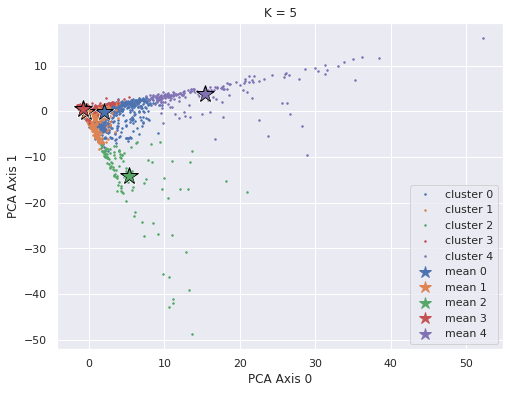

In [ ]:
# CHANGE THIS TO PLOT DIFFERENT VALUES!
K = 5
pc_i = 0
pc_ii = 1

plt.figure(figsize=(8,6))
plt.title("K = %d" % K)
z, mu = res[K-1]
plot_K_means_pca(X, z, mu, pc_i, pc_ii, W, x_bar)
print(collections.Counter(z))

### RESULTS

In [ ]:
Ys = [Y[np.where(z==0)], Y[np.where(z==1)], Y[np.where(z==2)], Y[np.where(z==3)], Y[np.where(z==4)]] #,Y[np.where(z==5)],Y[np.where(z==6)]
means = [np.mean(Y[np.where(z==0)]), np.mean(Y[np.where(z==1)]), np.mean(Y[np.where(z==2)]), np.mean(Y[np.where(z==3)]), np.mean(Y[np.where(z==4)])] #, np.mean(Y[np.where(z==5)]), np.mean(Y[np.where(z==6)])
medians = [np.median(Y[np.where(z==0)]), np.median(Y[np.where(z==1)]), np.median(Y[np.where(z==2)]), np.median(Y[np.where(z==3)]), np.median(Y[np.where(z==4)])] #,np.median(Y[np.where(z==5)]),np.median(Y[np.where(z==6)])
stds = [np.std(Y[np.where(z==0)]), np.std(Y[np.where(z==1)]), np.std(Y[np.where(z==2)]), np.std(Y[np.where(z==3)]), np.std(Y[np.where(z==4)])] #,np.std(Y[np.where(z==5)]),np.std(Y[np.where(z==6)])
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'] #, 'Cluster 6', 'Cluster 7'

In [ ]:
means, medians, stds

([63.86527405070909,
  64.4028225560074,
  66.23496562689694,
  64.46387512512997,
  64.27042422713558],
 [63.61571428571429,
  64.20000000000002,
  65.63542857142858,
  64.57295238095239,
  64.29166328600405],
 [9.12440783924089,
  9.91545703419857,
  10.511666853936367,
  11.011402208850368,
  10.273967384508229])

[Text(0, 0, 'Cluster 1'),
 Text(0, 0, 'Cluster 2'),
 Text(0, 0, 'Cluster 3'),
 Text(0, 0, 'Cluster 4'),
 Text(0, 0, 'Cluster 5')]

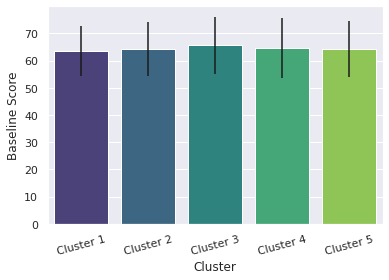

In [ ]:
fig1 = sns.barplot(x = labels, y = medians, yerr = stds, palette='viridis')
fig1.set(xlabel='Cluster', ylabel='Baseline Score')
fig1.set_xticklabels(labels, rotation=15)

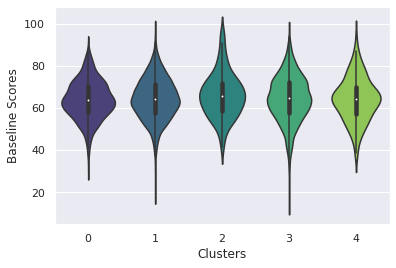

In [ ]:
ax = sns.violinplot(data = [Y[np.where(z==0)], Y[np.where(z==1)], Y[np.where(z==2)], Y[np.where(z==3)], Y[np.where(z==4)]], palette='viridis') #,Y[np.where(z==5)],Y[np.where(z==6)]
ax.set(xlabel='Clusters', ylabel='Baseline Scores')
plt.show()

In [ ]:
Ss = [S[np.where(z==0)],S[np.where(z==1)],S[np.where(z==2)],S[np.where(z==3)],S[np.where(z==4)]]

In [ ]:
risk = np.zeros((K,len(dim_names)))
well = np.zeros((K,len(dim_names)))
thriving = np.zeros((K,len(dim_names)))
for k in range(K):
  for dim in range(len(dim_names)):
    for j in range(len(Ss[k][:,dim])):
      if Ss[k][j,dim] <=1:
        risk[k,dim] = risk[k,dim] + 1
      elif Ss[k][j,dim] <=4:
        well[k,dim] = well[k,dim] + 1
      elif Ss[k][j,dim] <=6:
        thriving[k,dim] = thriving[k,dim] + 1

In [ ]:
names = ['Relationships','Self-Esteem','Body','Quality of life','Growth','Emotional','Work']

In [ ]:
data_dimension = {'Dimension' : names,
         'Cluster 1 - R' : risk[0,:]/(risk[0,:] + well[0,:] + thriving[0,:]) * 100,
         'Cluster 1 - W': well[0,:]/(risk[0,:] + well[0,:] + thriving[0,:]) * 100,
         'Cluster 1 - T': thriving[0,:]/(risk[0,:] + well[0,:] + thriving[0,:]) * 100,
         'Cluster 2 - R' : risk[1,:]/(risk[1,:] + well[1,:] + thriving[1,:]) * 100,
         'Cluster 2 - W': well[1,:]/(risk[1,:] + well[1,:] + thriving[1,:]) * 100,
         'Cluster 2 - T': thriving[1,:]/(risk[1,:] + well[1,:] + thriving[1,:]) * 100,
         'Cluster 3 - R' : risk[2,:]/(risk[2,:] + well[2,:] + thriving[2,:]) * 100,
         'Cluster 3 - W': well[2,:]/(risk[2,:] + well[2,:] + thriving[2,:]) * 100,
         'Cluster 3 - T': thriving[2,:]/(risk[2,:] + well[2,:] + thriving[2,:]) * 100,
         'Cluster 4 - R' : risk[3,:]/(risk[3,:] + well[3,:] + thriving[3,:]) * 100,
         'Cluster 4 - W': well[3,:]/(risk[3,:] + well[3,:] + thriving[3,:]) * 100,
         'Cluster 4 - T': thriving[3,:]/(risk[3,:] + well[3,:] + thriving[3,:]) * 100,
         'Cluster 5 - R' : risk[4,:]/(risk[4,:] + well[4,:] + thriving[4,:]) * 100,
         'Cluster 5 - W': well[4,:]/(risk[4,:] + well[4,:] + thriving[4,:]) * 100,
         'Cluster 5 - T': thriving[4,:]/(risk[4,:] + well[4,:] + thriving[4,:]) * 100}
df_dimension = pd.DataFrame(data_dimension) 
df_dimension

,Dimension,Cluster 1 - R,Cluster 1 - W,Cluster 1 - T,Cluster 2 - R,Cluster 2 - W,Cluster 2 - T,Cluster 3 - R,Cluster 3 - W,Cluster 3 - T,Cluster 4 - R,Cluster 4 - W,Cluster 4 - T,Cluster 5 - R,Cluster 5 - W,Cluster 5 - T
0,Relationships,27.749141,45.189003,27.061856,25.362442,47.620672,27.016886,25.510204,46.938776,27.551020,22.766571,49.063401,28.170029,29.775281,42.696629,27.528090
1,Self-Esteem,32.397959,44.387755,23.214286,30.521697,44.661141,24.817162,32.673267,38.613861,28.712871,27.725268,46.061752,26.212980,38.202247,35.393258,26.404494
2,Body,40.165975,39.087137,20.746888,37.874382,38.964815,23.160803,32.692308,38.461538,28.846154,35.722222,41.944444,22.333333,41.807910,35.028249,23.163842
3,Quality of life,30.202429,44.858300,24.939271,31.842072,42.379182,25.778746,26.956522,40.000000,33.043478,32.782272,42.525501,24.692227,24.858757,44.067797,31.073446
4,Growth,32.332155,44.346290,23.321555,32.642487,40.872858,26.484655,31.578947,42.105263,26.315789,31.218698,42.988314,25.792988,30.898876,42.696629,26.404494
5,Emotional,28.496503,45.279720,26.223776,27.511503,45.648006,26.840491,25.773196,40.206186,34.020619,26.858513,46.602718,26.538769,26.553672,44.067797,29.378531
6,Work,32.987910,40.414508,26.597582,31.739130,40.670290,27.590580,19.791667,38.541667,41.666667,31.430746,43.378995,25.190259,36.000000,32.000000,32.000000


In [ ]:
df_dimension.to_csv('data_dimension.csv')
!cp data_dimension.csv "drive/My Drive/thesis/"

In [ ]:
data_septiles = {'Cluster' : range(K),
         'social - R' : risk[:,0]/(risk[:,0] + well[:,0] + thriving[:,0]) * 100,
         'social - W': well[:,0]/(risk[:,0] + well[:,0] + thriving[:,0]) * 100,
         'social - T': thriving[:,0]/(risk[:,0] + well[:,0] + thriving[:,0]) * 100,
         'emotional - R' : risk[:,1]/(risk[:,1] + well[:,1] + thriving[:,1]) * 100,
         'emotional - W': well[:,1]/(risk[:,1] + well[:,1] + thriving[:,1]) * 100,
         'emotional - T': thriving[:,1]/(risk[:,1] + well[:,1] + thriving[:,1]) * 100,
         'physical - R' : risk[:,2]/(risk[:,2] + well[:,2] + thriving[:,2]) * 100,
         'physical - W': well[:,2]/(risk[:,2] + well[:,2] + thriving[:,2]) * 100,
         'physical - T': thriving[:,2]/(risk[:,2] + well[:,2] + thriving[:,2]) * 100,
         'global - R' : risk[:,3]/(risk[:,3] + well[:,3] + thriving[:,3]) * 100,
         'global - W': well[:,3]/(risk[:,3] + well[:,3] + thriving[:,3]) * 100,
         'global - T': thriving[:,3]/(risk[:,3] + well[:,3] + thriving[:,3]) * 100,
         'learning_development - R' : risk[:,4]/(risk[:,4] + well[:,4] + thriving[:,4]) * 100,
         'learning_development - W': well[:,4]/(risk[:,4] + well[:,4] + thriving[:,4]) * 100,
         'learning_development - T': thriving[:,4]/(risk[:,4] + well[:,4] + thriving[:,4]) * 100,
         'psychological - R' : risk[:,5]/(risk[:,5] + well[:,5] + thriving[:,5]) * 100,
         'psychological - W': well[:,5]/(risk[:,5] + well[:,5] + thriving[:,5]) * 100,
         'psychological - T': thriving[:,5]/(risk[:,5] + well[:,5] + thriving[:,5]) * 100,
         'work_related - R' : risk[:,6]/(risk[:,6] + well[:,6] + thriving[:,6]) * 100,
         'work_related - W': well[:,6]/(risk[:,6] + well[:,6] + thriving[:,6]) * 100,
         'work_related - T': thriving[:,6]/(risk[:,6] + well[:,6] + thriving[:,6]) * 100}
df_septiles = pd.DataFrame(data_septiles) 
df_septiles.head()

,Cluster,social - R,social - W,social - T,emotional - R,emotional - W,emotional - T,physical - R,physical - W,physical - T,global - R,global - W,global - T,learning_development - R,learning_development - W,learning_development - T,psychological - R,psychological - W,psychological - T,work_related - R,work_related - W,work_related - T
0,0,27.749141,45.189003,27.061856,32.397959,44.387755,23.214286,40.165975,39.087137,20.746888,30.202429,44.858300,24.939271,32.332155,44.346290,23.321555,28.496503,45.279720,26.223776,32.987910,40.414508,26.597582
1,1,25.362442,47.620672,27.016886,30.521697,44.661141,24.817162,37.874382,38.964815,23.160803,31.842072,42.379182,25.778746,32.642487,40.872858,26.484655,27.511503,45.648006,26.840491,31.739130,40.670290,27.590580
2,2,25.510204,46.938776,27.551020,32.673267,38.613861,28.712871,32.692308,38.461538,28.846154,26.956522,40.000000,33.043478,31.578947,42.105263,26.315789,25.773196,40.206186,34.020619,19.791667,38.541667,41.666667
3,3,22.766571,49.063401,28.170029,27.725268,46.061752,26.212980,35.722222,41.944444,22.333333,32.782272,42.525501,24.692227,31.218698,42.988314,25.792988,26.858513,46.602718,26.538769,31.430746,43.378995,25.190259
4,4,29.775281,42.696629,27.528090,38.202247,35.393258,26.404494,41.807910,35.028249,23.163842,24.858757,44.067797,31.073446,30.898876,42.696629,26.404494,26.553672,44.067797,29.378531,36.000000,32.000000,32.000000


In [ ]:
df_septiles.to_csv('data_septiles.csv')
!cp data_septiles.csv "drive/My Drive/thesis/"

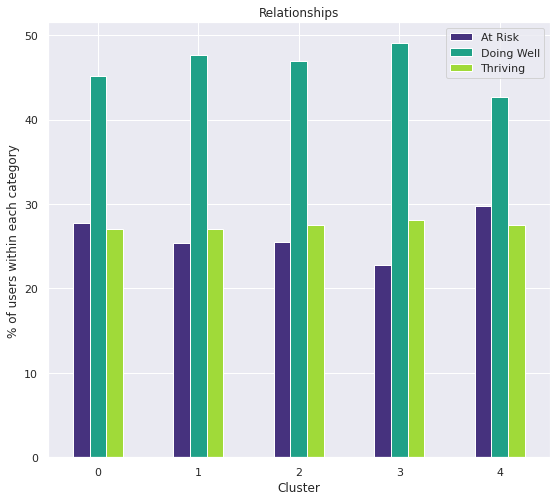

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_septiles.plot(x="Cluster", y=["social - R", "social - W", "social - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=0)
plt.title('Relationships')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

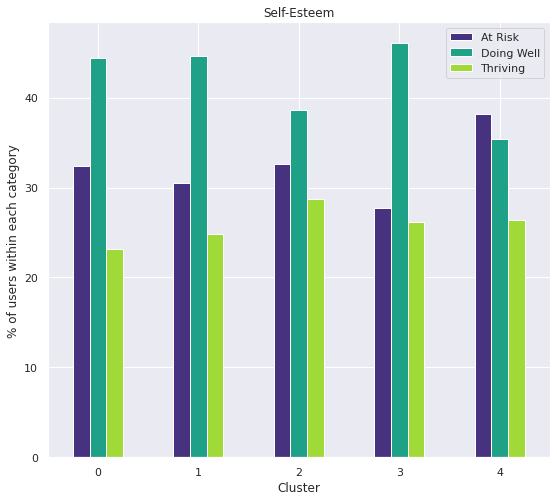

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_septiles.plot(x="Cluster", y=["emotional - R", "emotional - W", "emotional - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=0)
plt.title('Self-Esteem')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

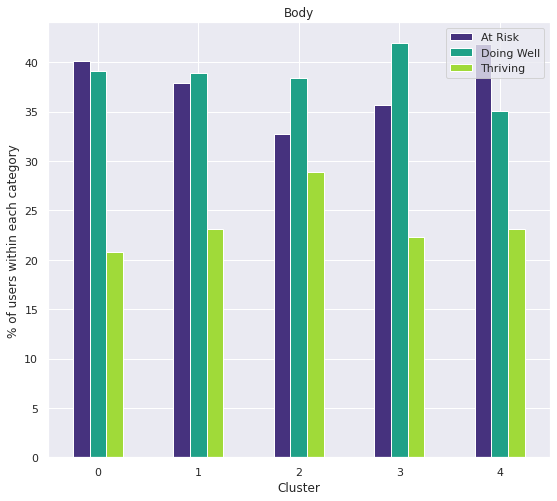

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_septiles.plot(x="Cluster", y=["physical - R", "physical - W", "physical - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=0)
plt.title('Body')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

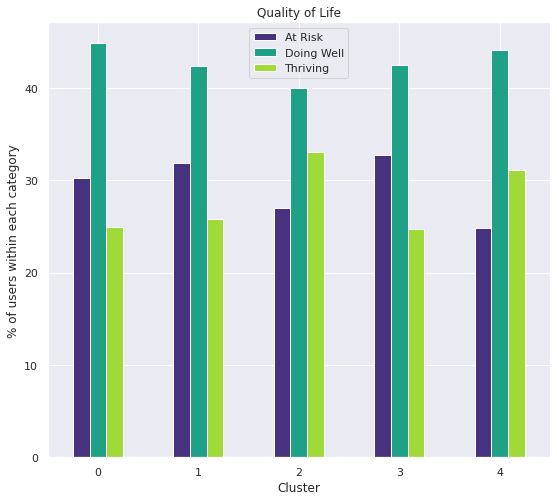

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_septiles.plot(x="Cluster", y=["global - R", "global - W", "global - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=0)
plt.title('Quality of Life')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

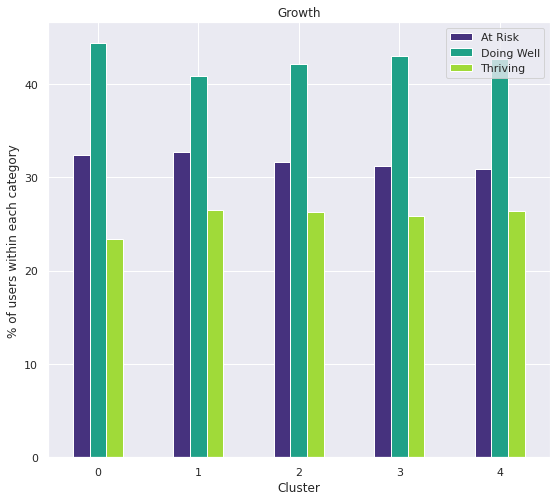

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_septiles.plot(x="Cluster", y=["learning_development - R", "learning_development - W", "learning_development - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=0)
plt.title('Growth')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

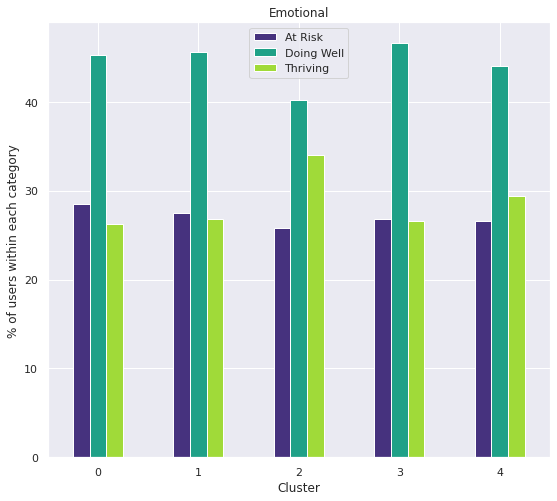

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_septiles.plot(x="Cluster", y=["psychological - R", "psychological - W", "psychological - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=0)
plt.title('Emotional')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

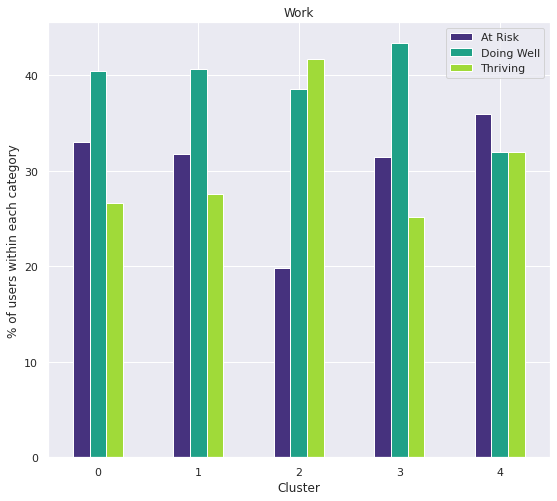

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_septiles.plot(x="Cluster", y=["work_related - R", "work_related - W", "work_related - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=0)
plt.title('Work')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

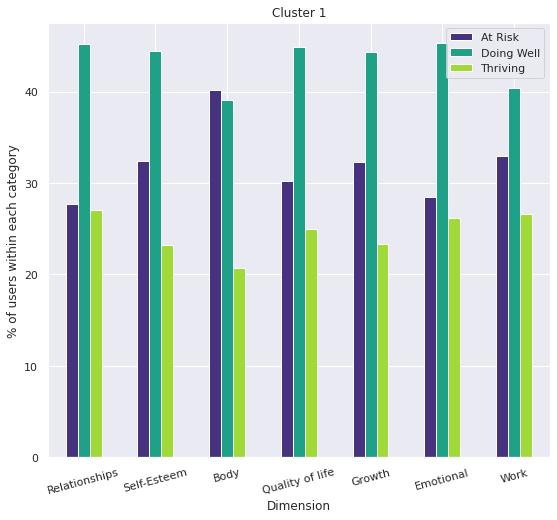

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_dimension.plot(x="Dimension", y=["Cluster 1 - R", "Cluster 1 - W", "Cluster 1 - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=15)
plt.title('Cluster 1')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

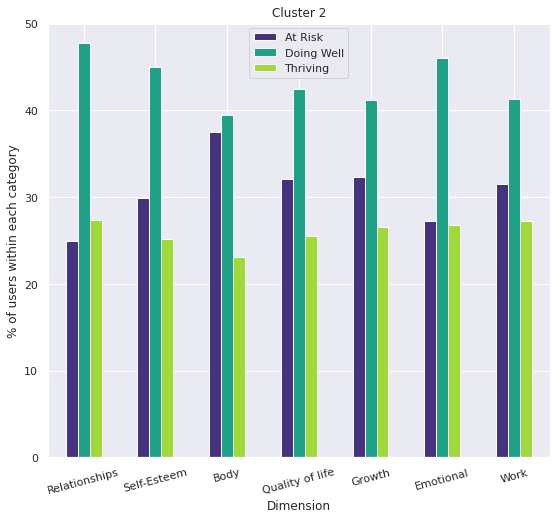

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_dimension.plot(x="Dimension", y=["Cluster 2 - R", "Cluster 2 - W", "Cluster 2 - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=15)
plt.title('Cluster 2')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

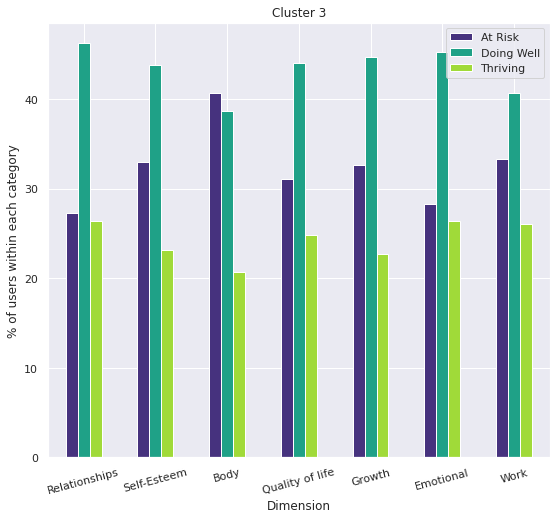

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_dimension.plot(x="Dimension", y=["Cluster 3 - R", "Cluster 3 - W", "Cluster 3 - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=15)
plt.title('Cluster 3')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

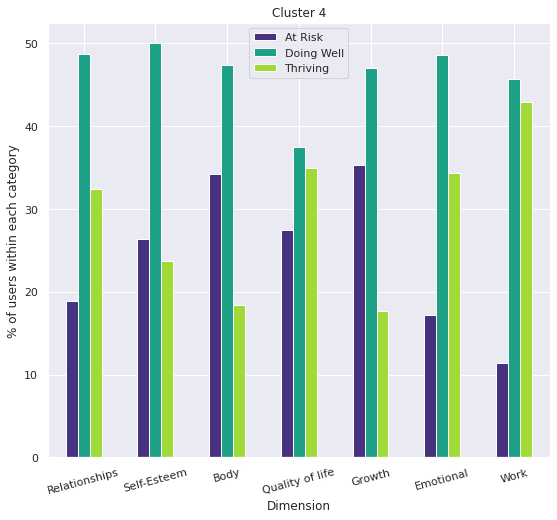

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_dimension.plot(x="Dimension", y=["Cluster 4 - R", "Cluster 4 - W", "Cluster 4 - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=15)
plt.title('Cluster 4')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

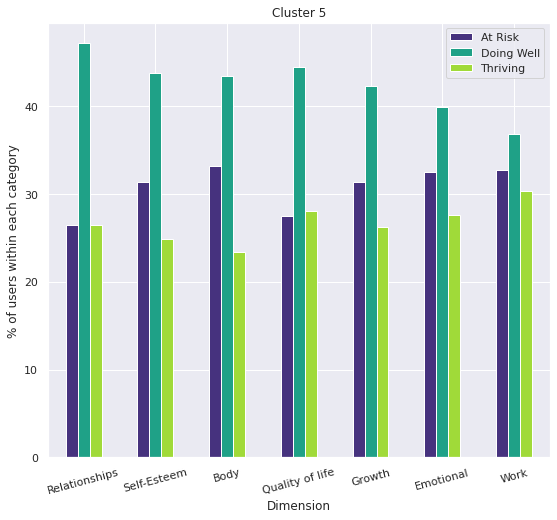

In [ ]:
my_cmap = ListedColormap(sns.color_palette('viridis').as_hex())
df_dimension.plot(x="Dimension", y=["Cluster 5 - R", "Cluster 5 - W", "Cluster 5 - T"], kind="bar",figsize=(9,8), cmap = my_cmap)
plt.xticks(rotation=15)
plt.title('Cluster 5')
plt.ylabel('% of users within each category')
plt.legend(labels = ['At Risk', 'Doing Well', 'Thriving'])
plt.show()

In [ ]:
def ClusterAnalysis(X, z, K):

  '''This function provides an overview of each cluster to gain a sense 
  of the types of user placed in each cluster. By pairing these with the
  average baseline scores, we can start to build a picture of the 
  relationship between the two.

   INPUTS:
    X     : (N, D) matrix; each row is a D-dimensional data point
    z     : (N,) vector of integers indicating final cluster assignment
    K     : integer, number of clusters

    OUTPUTS:
    A     : (K, D) matrix; each row denotes mean of each variable for 
            each cluster
    S     : (K, D) matrix; each row denotes std of each variable for 
            each cluster            
  
  '''
  #---------------------------------------------------------------------#
  #setting up dims/matrices

  (N,D) = X.shape
  A = np.empty((K,D))
  S = np.empty((K,D))

  #---------------------------------------------------------------------#
  #taking mean and std of each variable in each cluster

  for k in range(K):
    for d in range(D):
      A[k,d] = np.mean(X[np.where(z==k)][:,d])
      S[k,d] = np.std(X[np.where(z==k)][:,d])
      
  return A,S

In [ ]:
mean_overall, std_overall = ClusterAnalysis(Xb,z,K)

In [ ]:
mean_overall

array([[8.36572581e+01, 1.12580645e+00, 1.01717742e+01, 3.02951613e+01,
        5.34737903e+00, 1.16713710e+00, 1.53830645e-01, 7.20181452e+00,
        1.50435484e+01, 2.28928609e+01, 1.67266250e+01, 1.40475806e+01,
        5.09691290e+01, 3.29647339e+01, 9.77258065e+01, 1.90782258e+01,
        8.47500000e+00, 3.07991935e+01],
       [3.08973768e+01, 2.25207933e-02, 1.14702495e+00, 1.77525272e+01,
        2.60572617e+00, 5.33333333e-01, 8.27575176e-02, 5.89584133e+00,
        8.88755598e+00, 2.18224862e+01, 1.07953800e+01, 2.60946897e+00,
        1.84222598e+01, 1.94655886e+00, 6.94817658e-01, 1.39155470e+00,
        9.41906590e-01, 3.49481766e+00],
       [6.76206897e+01, 5.86206897e-01, 9.71551724e+00, 3.42161638e+02,
        9.62392241e+01, 2.89719828e+01, 3.42025862e+00, 3.25926724e+01,
        1.23943966e+02, 3.72400862e+00, 5.41383621e+00, 1.25258621e+01,
        2.71825862e+01, 1.04162069e+01, 5.37500000e+01, 1.41293103e+01,
        6.93965517e+00, 2.94396552e+01],
       [2.315

In [ ]:
df_means = pd.DataFrame(mean_overall, columns=['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks'])
df_stds = pd.DataFrame(std_overall, columns=['Qus Answered', 'Remeasure', 'Daily workouts', 'Content accessed', 'Articles read', 'Videos watched', 'Podcasts listened', 'Newsletter read', 'Total Days', 'Mean between Visits', 'Standard Deviation', 'Total Days wbw', 'Mean between Visits wbw', 'Standard Deviation wbw', 'Remeasure clicks', 'Keep Track clicks', 'Dig Deeper clicks', 'Daily workout clicks'])

In [ ]:
collections.Counter(z)

Counter({0.0: 1240, 1.0: 7815, 2.0: 116, 3.0: 2848, 4.0: 178})

In [ ]:
df_means

,Qus Answered,Remeasure,Daily workouts,Content accessed,Articles read,Videos watched,Podcasts listened,Newsletter read,Total Days,Mean between Visits,Standard Deviation,Total Days wbw,Mean between Visits wbw,Standard Deviation wbw,Remeasure clicks,Keep Track clicks,Dig Deeper clicks,Daily workout clicks
0,83.657258,1.125806,10.171774,30.295161,5.347379,1.167137,0.153831,7.201815,15.043548,22.892861,16.726625,14.047581,50.969129,32.964734,97.725806,19.078226,8.475000,30.799194
1,30.897377,0.022521,1.147025,17.752527,2.605726,0.533333,0.082758,5.895841,8.887556,21.822486,10.795380,2.609469,18.422260,1.946559,0.694818,1.391555,0.941907,3.494818
2,67.620690,0.586207,9.715517,342.161638,96.239224,28.971983,3.420259,32.592672,123.943966,3.724009,5.413836,12.525862,27.182586,10.416207,53.750000,14.129310,6.939655,29.439655
3,23.156250,0.011938,0.814958,6.817591,0.343136,0.058023,0.010797,4.542310,4.719803,71.248828,36.022259,2.187851,16.514386,1.330403,0.618329,1.543890,0.439958,2.430478
4,396.848315,2.623596,121.219101,38.068820,6.067416,1.558989,0.169944,4.230337,19.799157,14.700871,12.888104,130.808989,2.460337,4.596854,354.528090,241.786517,125.640449,367.870787


In [ ]:
df_stds

,Qus Answered,Remeasure,Daily workouts,Content accessed,Articles read,Videos watched,Podcasts listened,Newsletter read,Total Days,Mean between Visits,Standard Deviation,Total Days wbw,Mean between Visits wbw,Standard Deviation wbw,Remeasure clicks,Keep Track clicks,Dig Deeper clicks,Daily workout clicks
0,53.447014,0.690006,17.135193,41.521768,10.128720,2.624988,0.470796,16.013387,20.419485,23.499778,17.173394,17.948272,65.476600,35.861438,97.537622,43.100009,20.963856,51.658049
1,16.132226,0.148370,3.770479,25.264499,6.011833,1.609297,0.317019,12.993685,11.845792,14.873880,9.069532,4.122905,21.866679,5.759257,5.435519,7.439806,5.926546,11.514088
2,72.764577,0.900852,23.503047,239.071113,57.117576,20.748540,3.334220,147.705426,93.953028,3.323675,5.467687,25.458371,44.475252,24.063423,90.954221,45.449201,22.623336,70.845180
3,19.420244,0.108608,3.703148,6.510178,1.351252,0.347404,0.104718,4.441554,3.124081,46.245159,24.836955,4.201579,20.411987,5.175249,7.628214,11.278094,3.220247,11.171484
4,182.181952,1.528348,83.046435,71.990864,12.104372,3.918772,0.563629,10.128128,39.777383,16.374339,13.506851,87.004246,1.757276,6.778454,228.613977,234.598197,154.009539,250.903939


In [ ]:
df_means.to_csv('data_means.csv')
!cp data_means.csv "drive/My Drive/thesis/"

In [ ]:
df_stds.to_csv('data_stds.csv')
!cp data_stds.csv "drive/My Drive/thesis/"